# ABS Quarterly Financial Accounts 5232

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-set-up" data-toc-modified-id="Python-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python set-up</a></span></li><li><span><a href="#Get-data-from-ABS" data-toc-modified-id="Get-data-from-ABS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get data from ABS</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot</a></span><ul class="toc-item"><li><span><a href="#Set-up-some-constants-we-will-use-across-all-plots" data-toc-modified-id="Set-up-some-constants-we-will-use-across-all-plots-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Set-up some constants we will use across all plots</a></span></li><li><span><a href="#Household-balance-sheet" data-toc-modified-id="Household-balance-sheet-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Household balance sheet</a></span></li></ul></li><li><span><a href="#Finished" data-toc-modified-id="Finished-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Finished</a></span></li></ul></div>

## Python set-up

In [1]:
# system imports
import pathlib
import calendar
import re

# analytic imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# local imports
from finalise_plot import finalise_plot
from abs_common import (
    get_fs_constants,
    get_plot_constants,
    get_ABS_meta_and_data,
    get_identifier,
    plot_Qgrowth,
    recalibrate_series
)

# pandas display settings
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# plotting stuff
plt.style.use('fivethirtyeight')

In [2]:
catalogue_id = '5232'
source, CHART_DIR, META_DATA = get_fs_constants(catalogue_id)

## Get data from ABS

In [3]:
# do the data capture and extraction
abs_dict = get_ABS_meta_and_data(catalogue_id)
if abs_dict is None:
    sys.exit(-1)

Found URL for a ZIP file on ABS web page
Retrieving zip-file from cache ...
Extracting DataFrames from the zip-file ...
Found URL for a ZIP file on ABS web page
Retrieving zip-file from cache ...
Extracting DataFrames from the zip-file ...


## Plot

### Set-up some constants we will use across all plots

In [4]:
meta = abs_dict[META_DATA]
RECENT, plot_times, plot_tags = get_plot_constants(meta)

### Household balance sheet

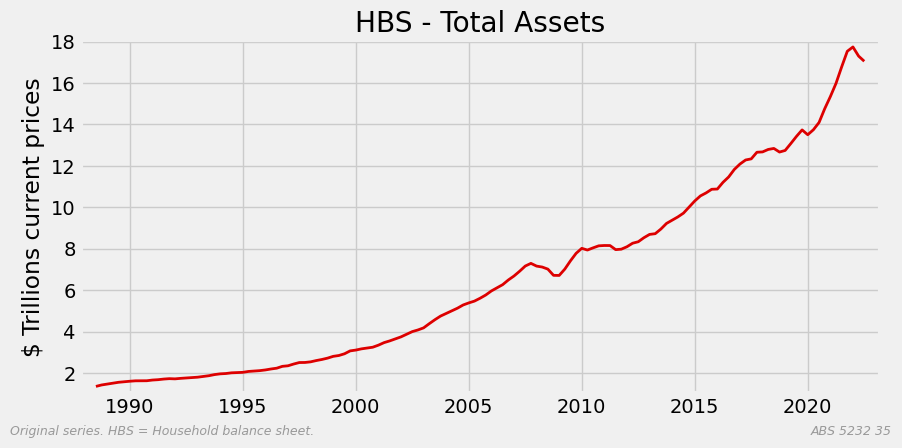

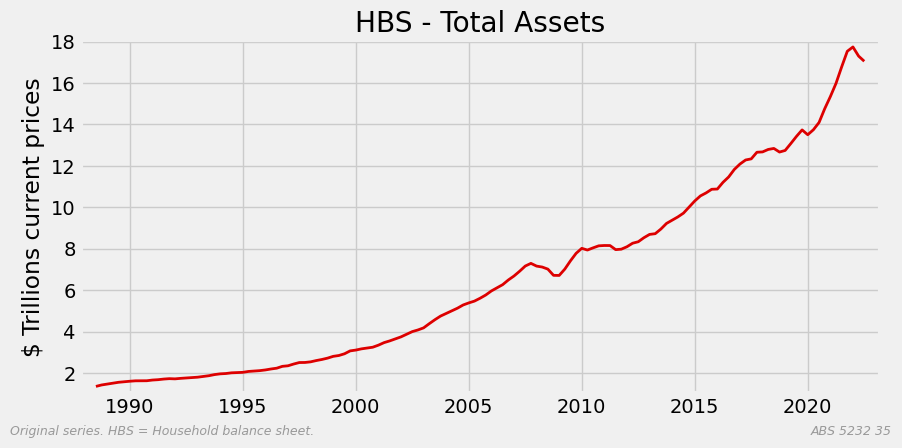

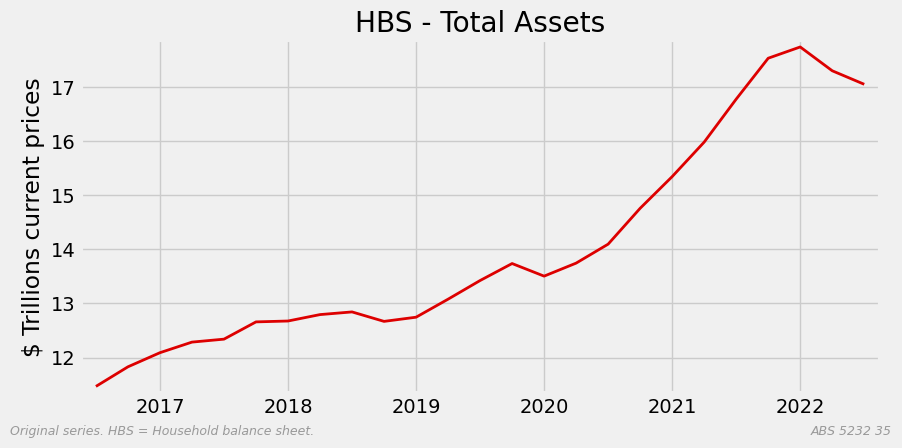

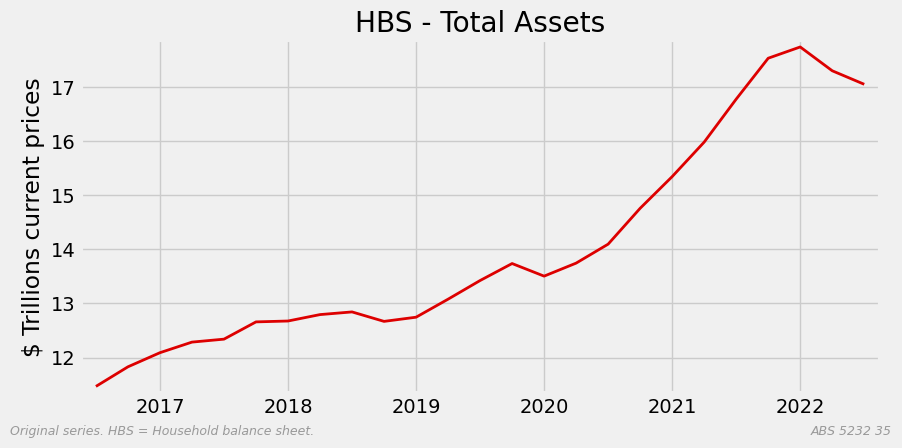

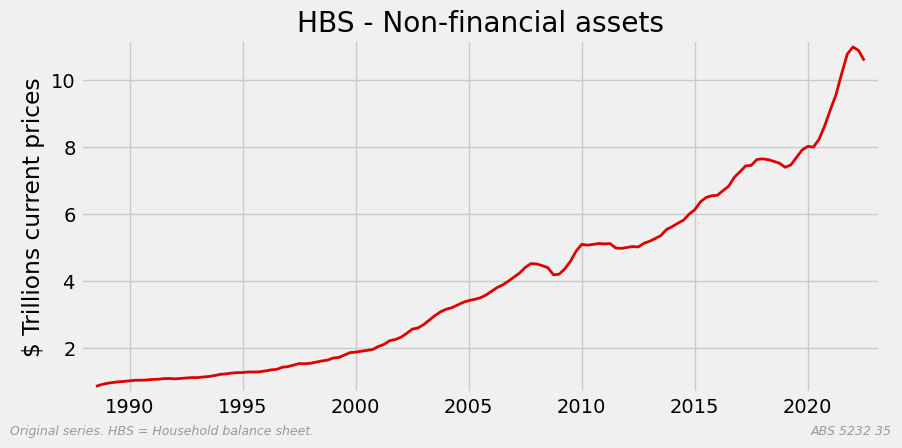

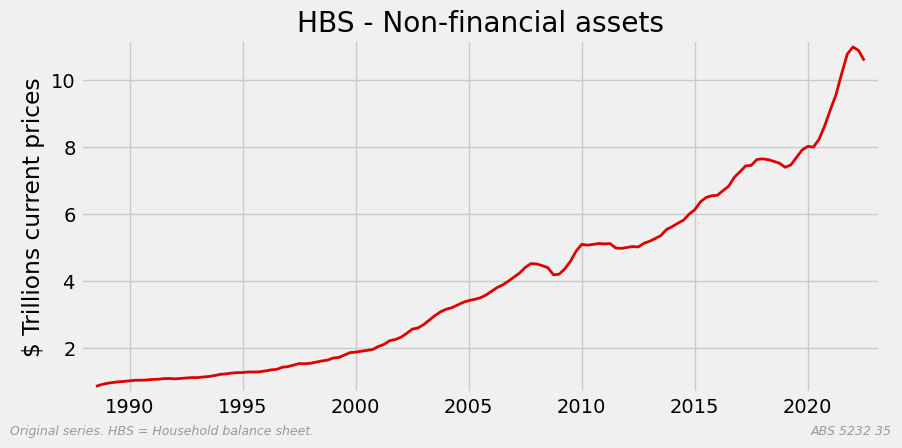

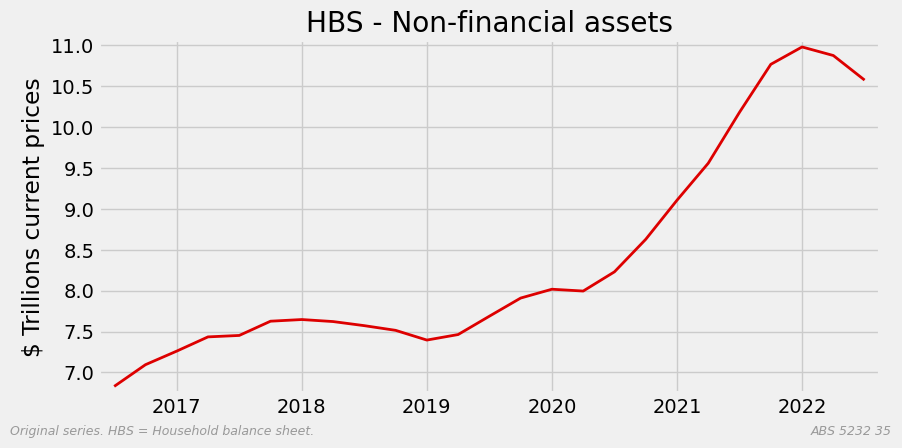

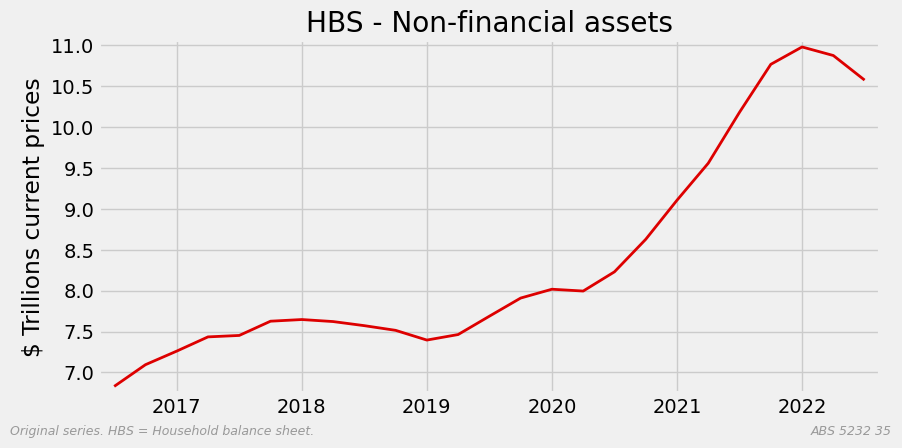

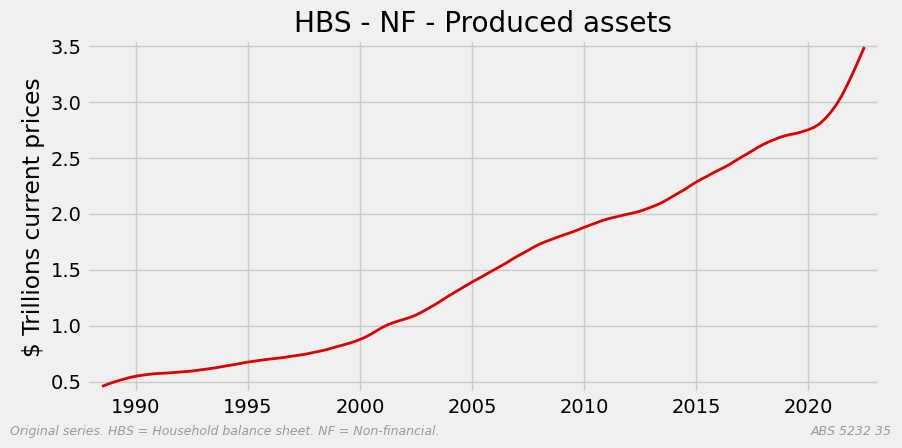

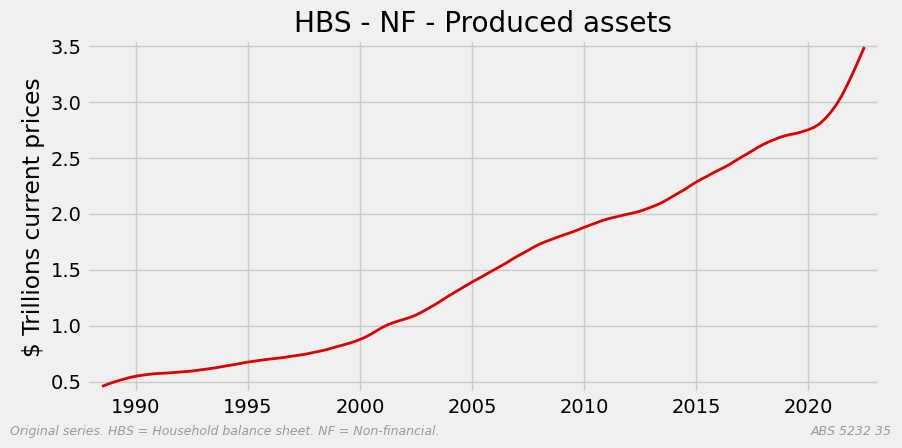

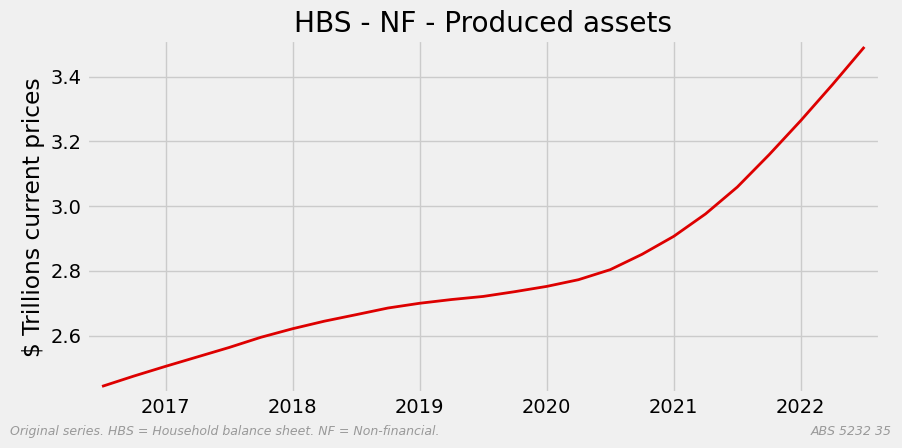

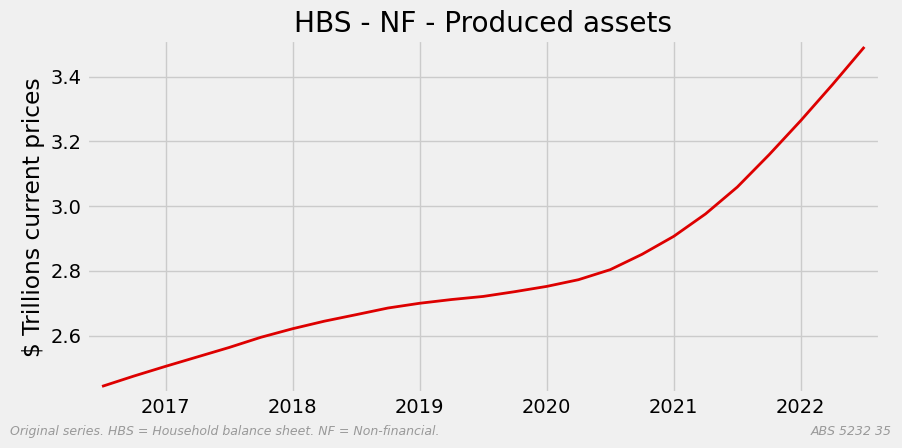

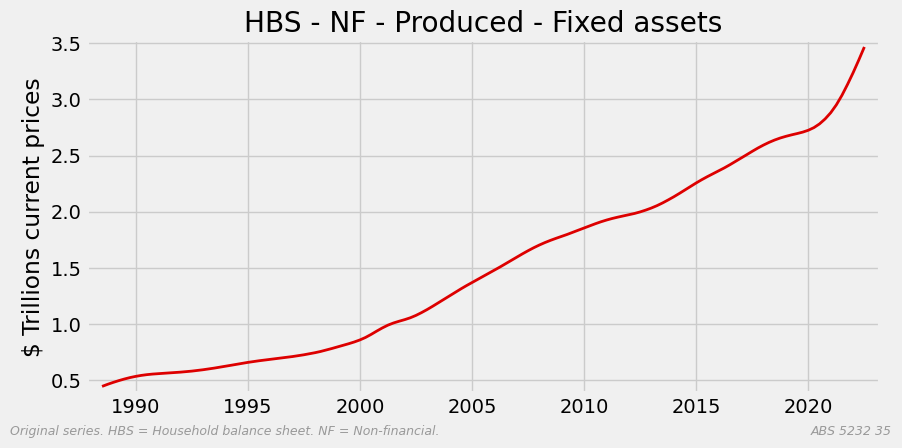

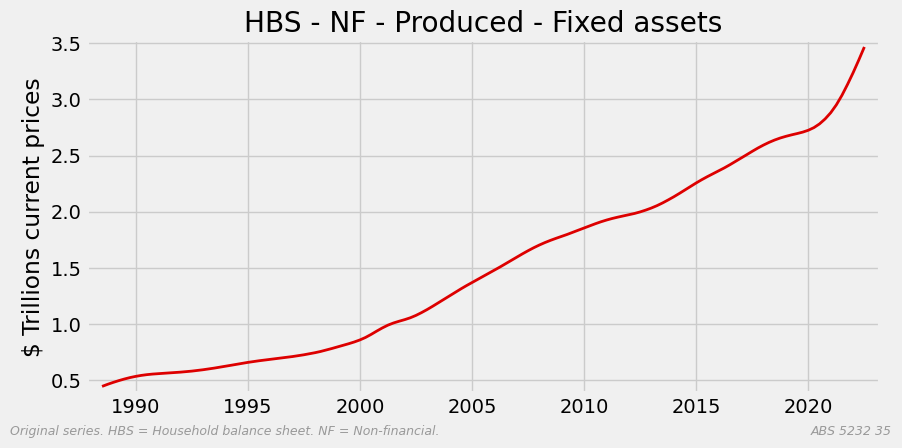

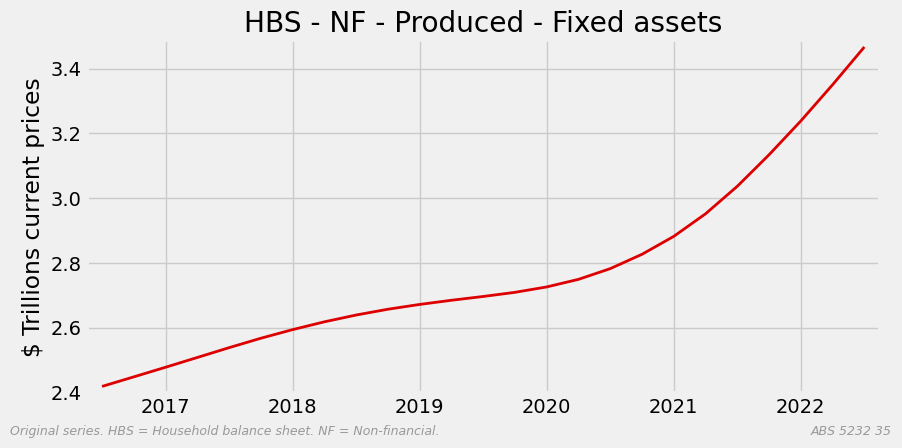

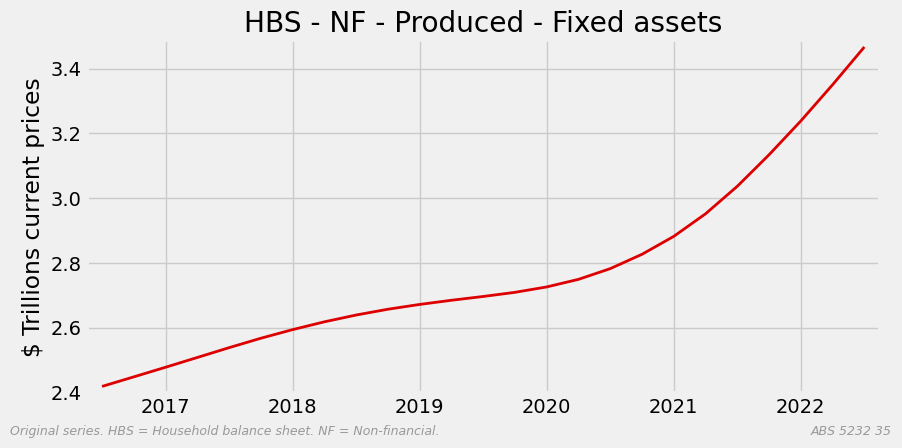

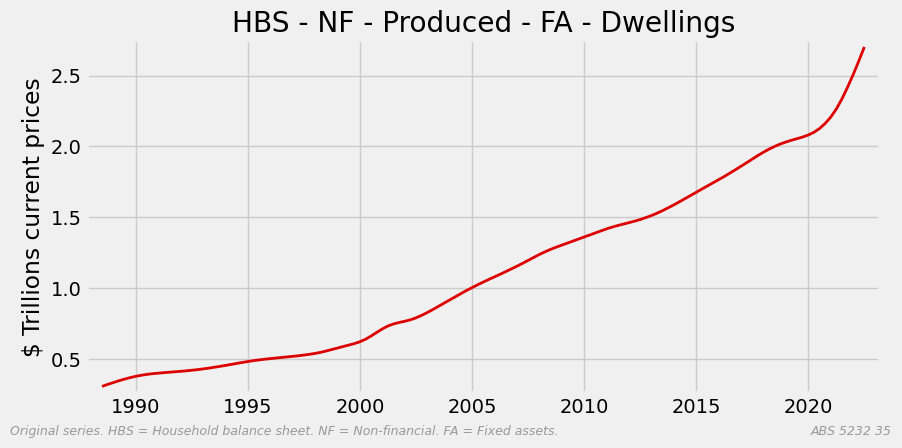

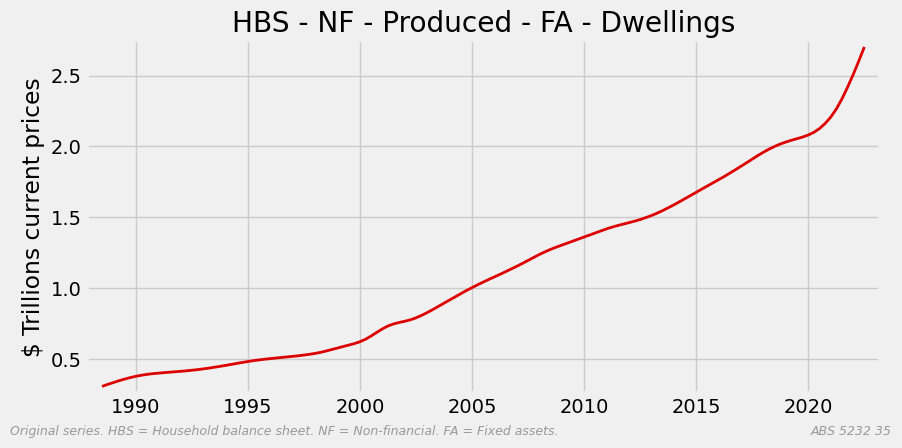

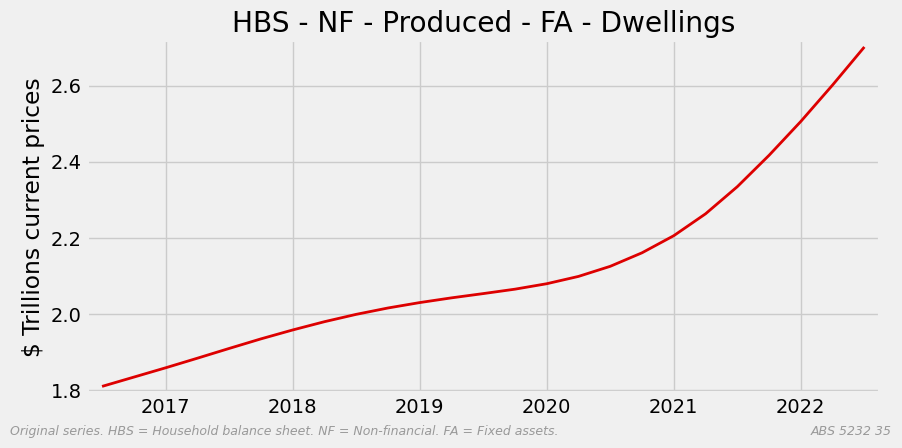

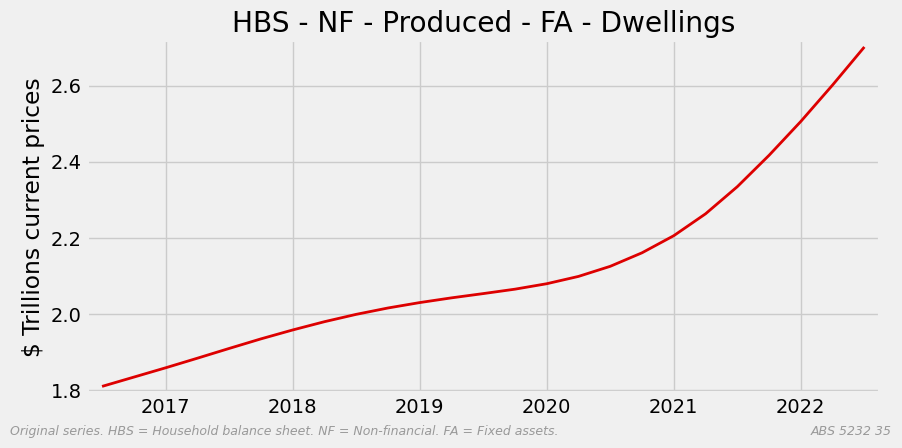

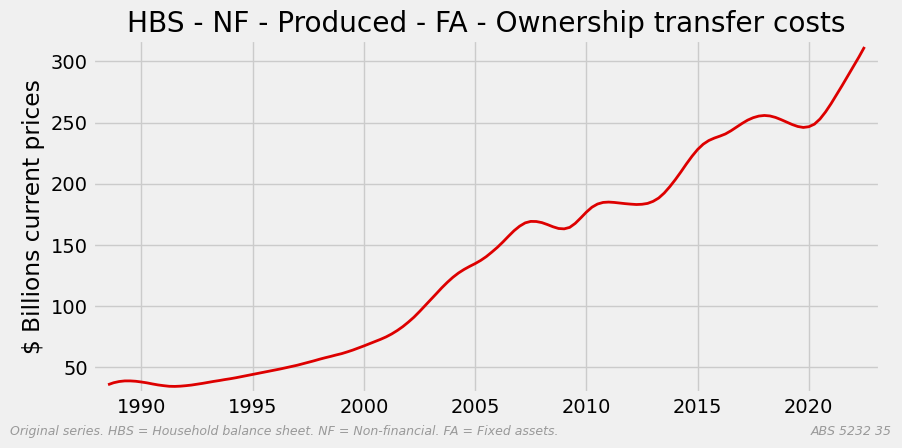

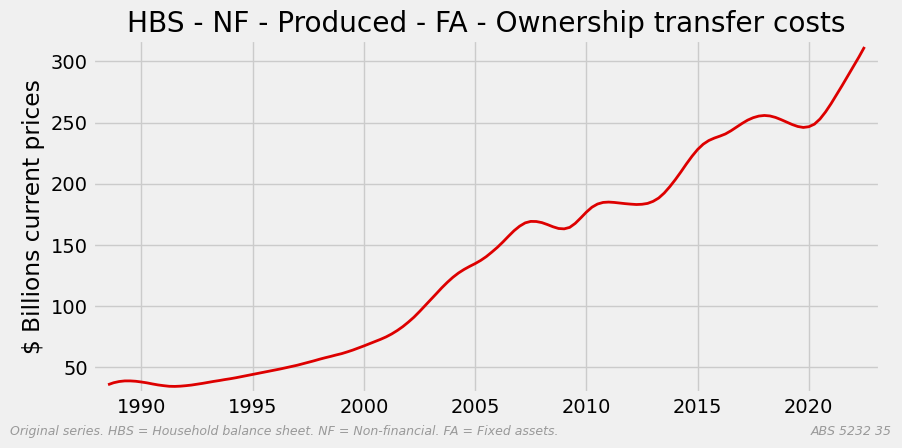

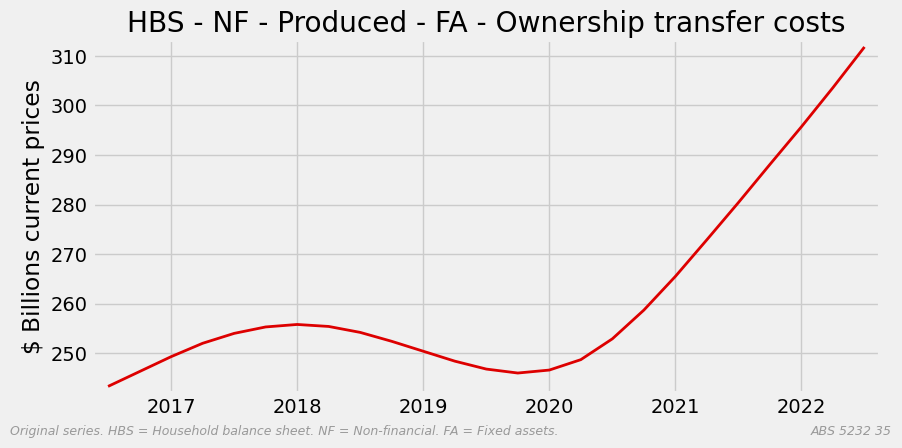

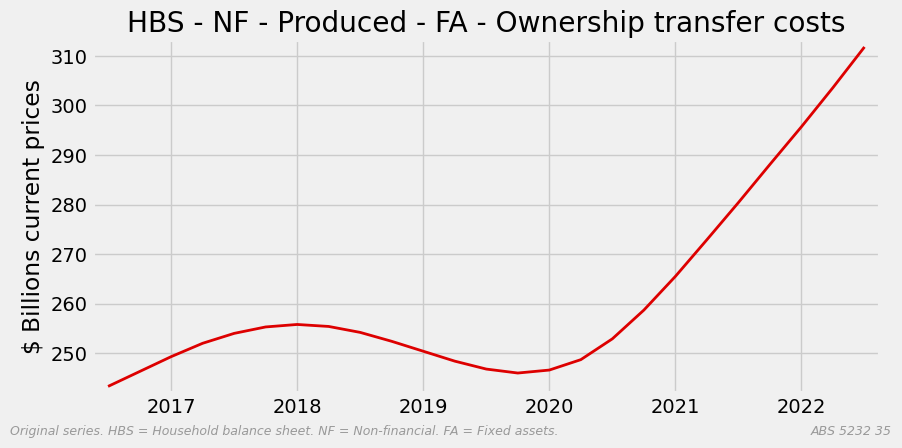

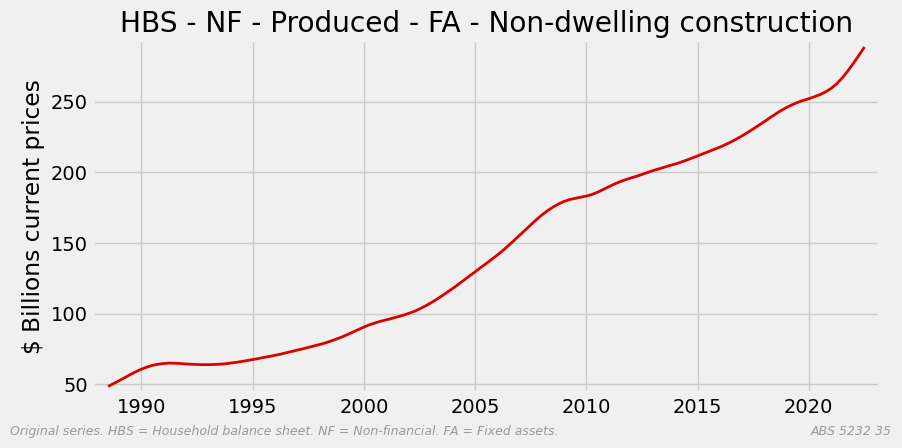

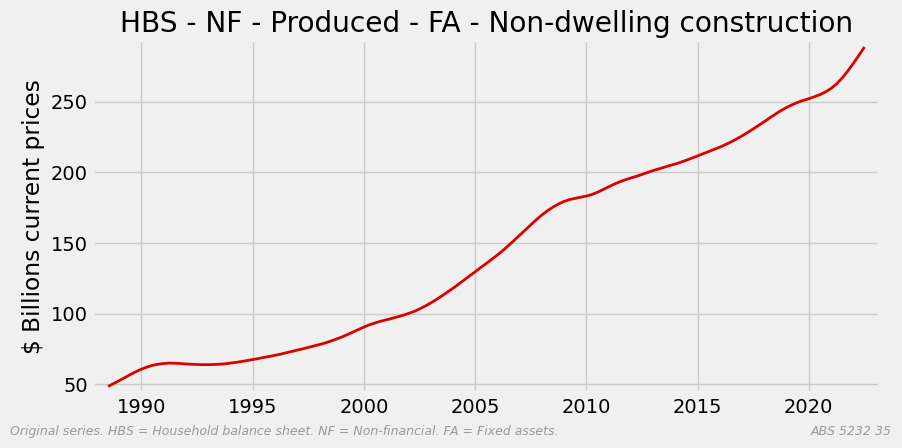

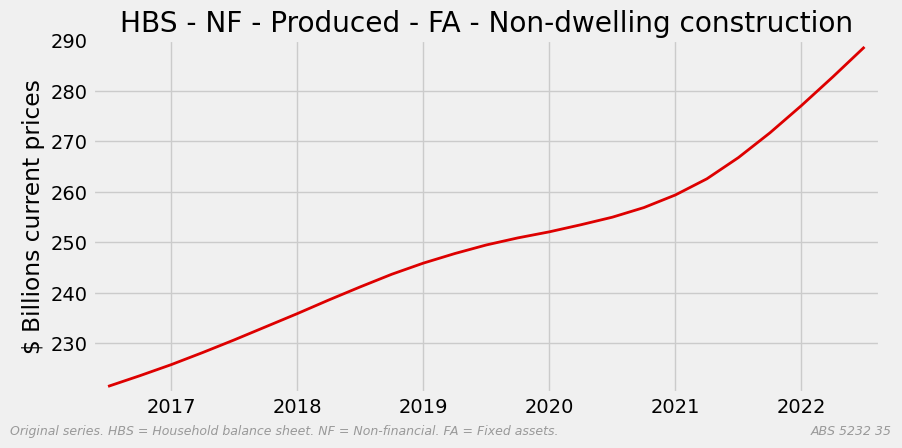

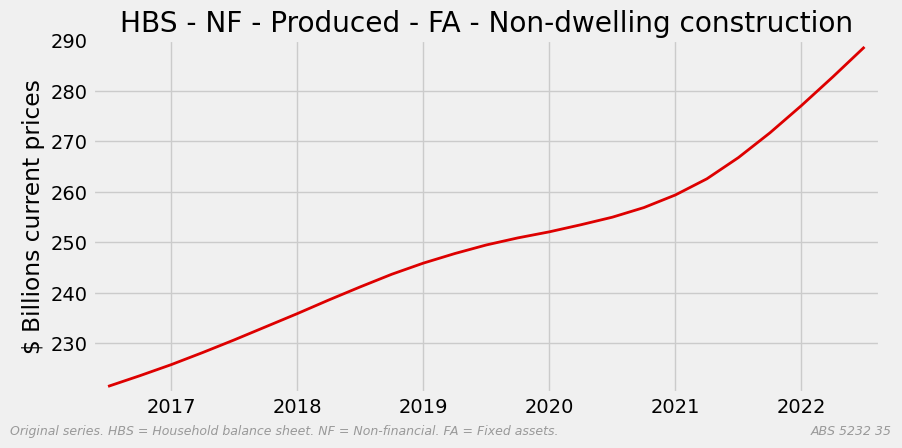

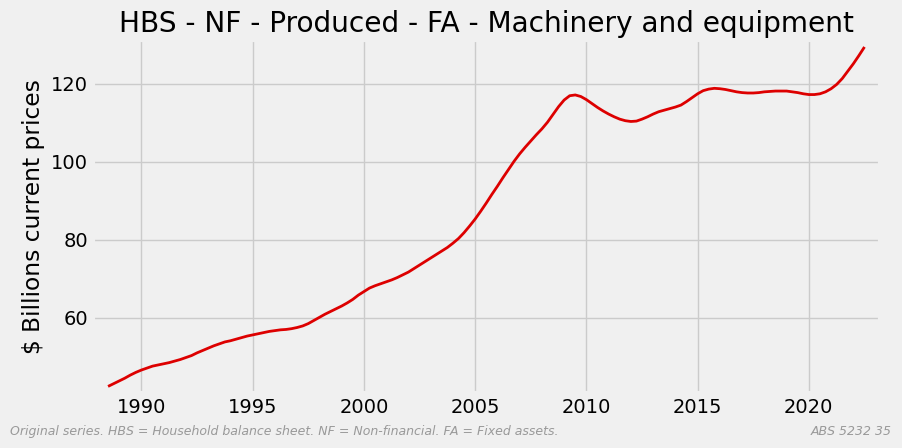

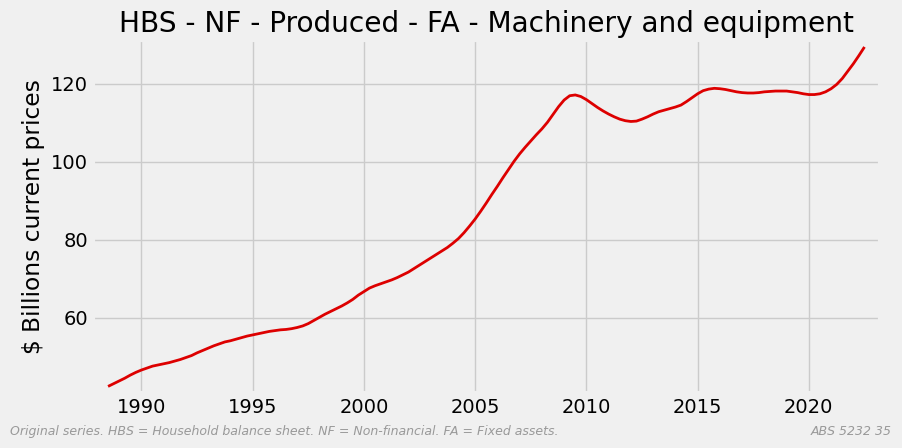

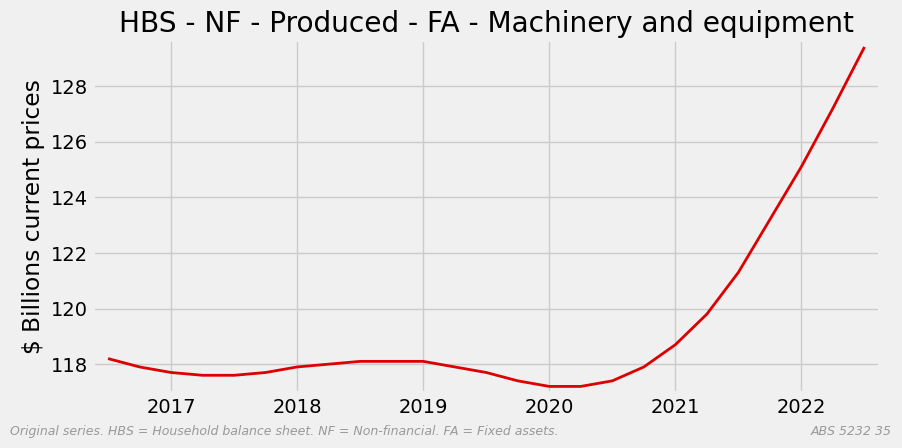

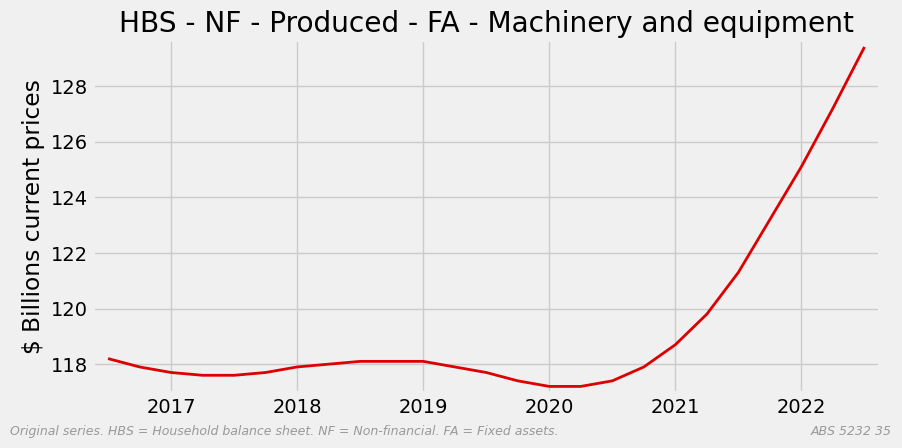

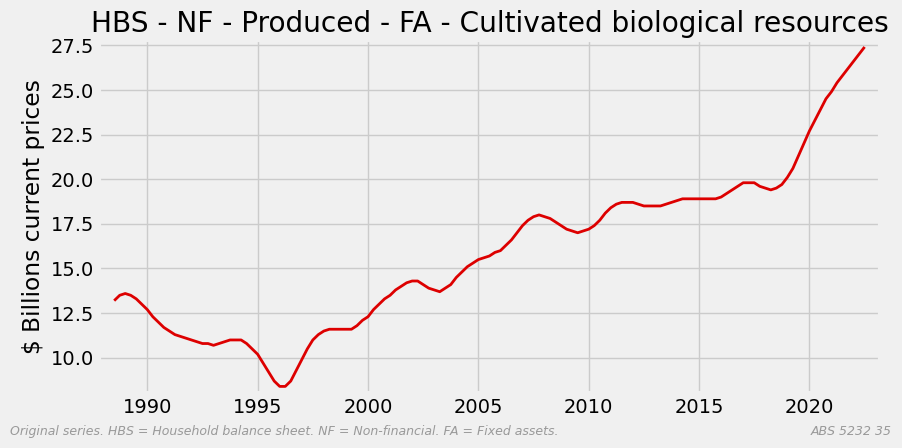

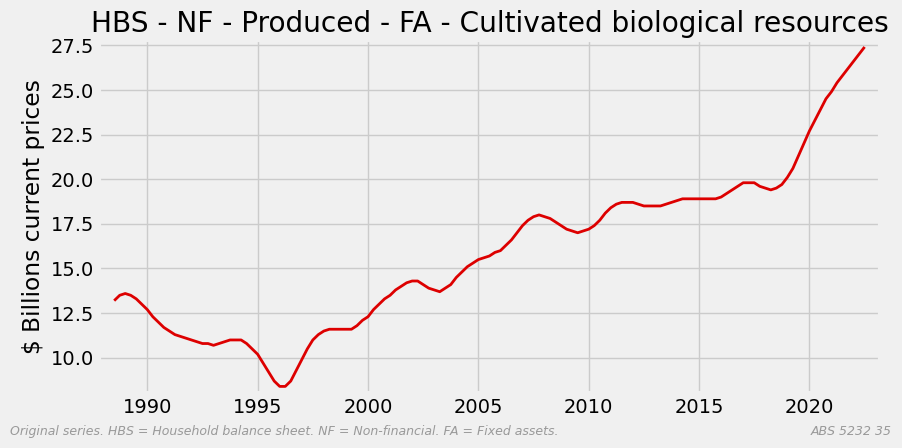

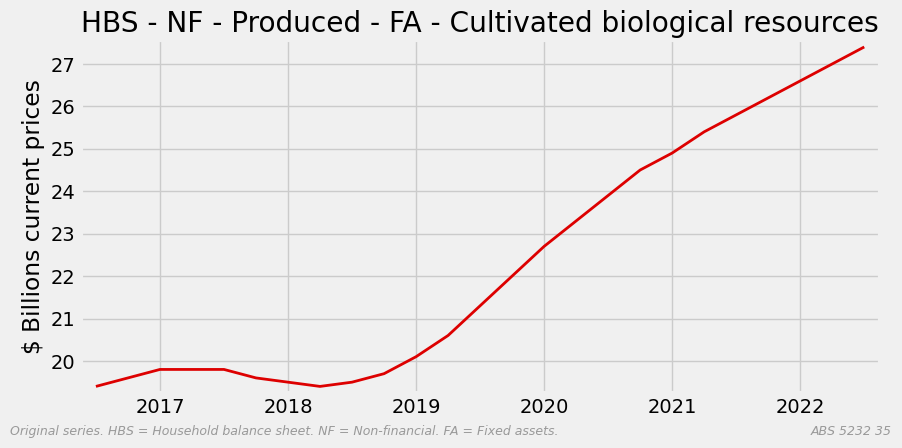

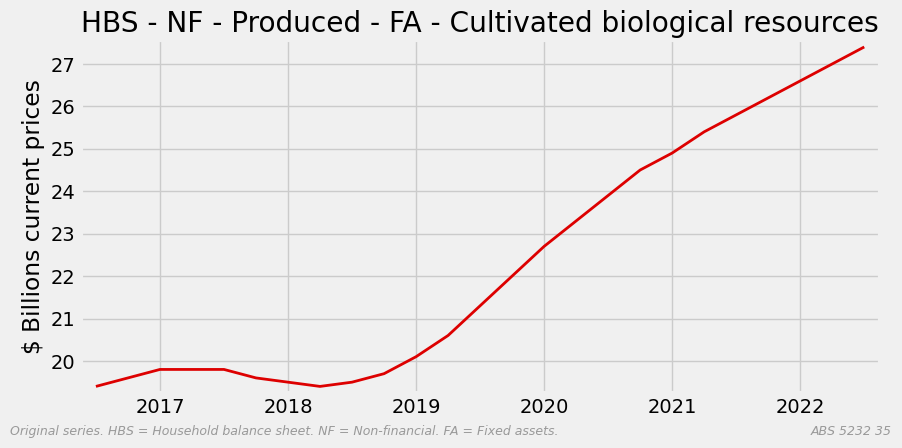

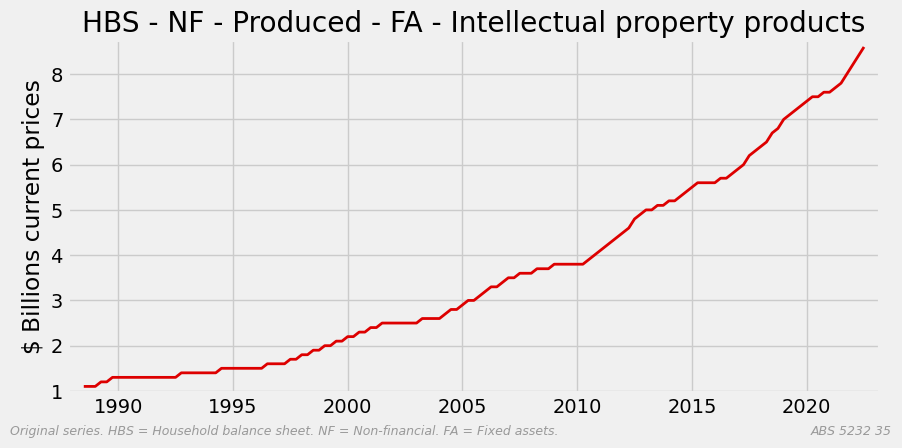

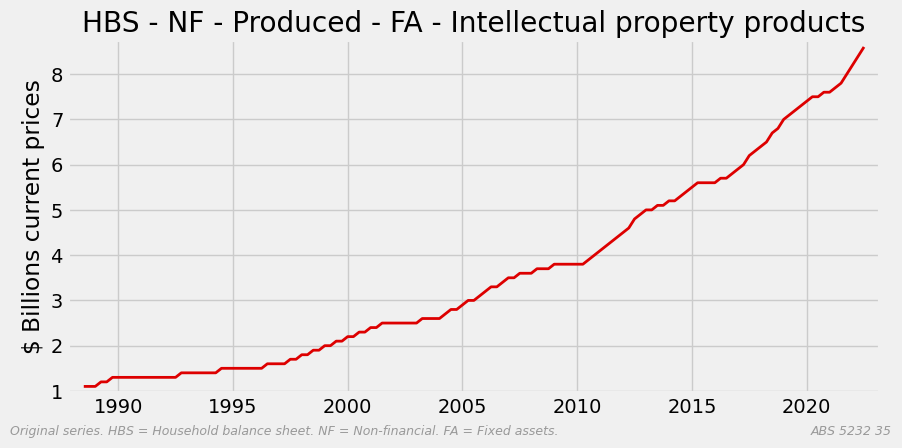

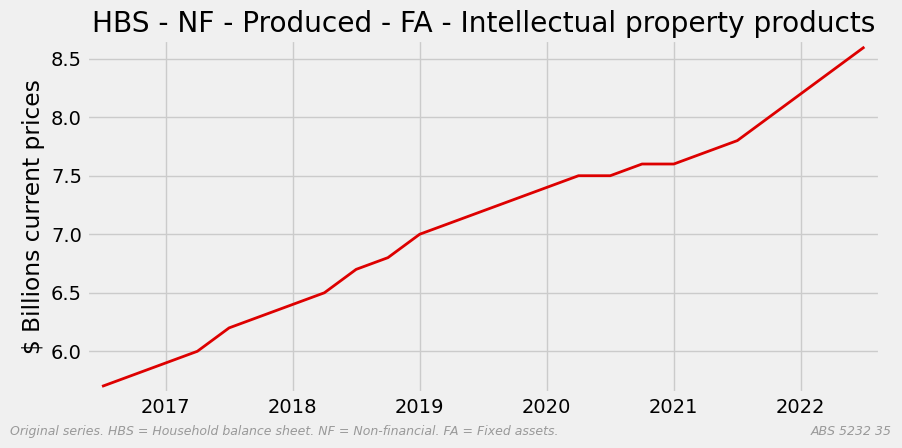

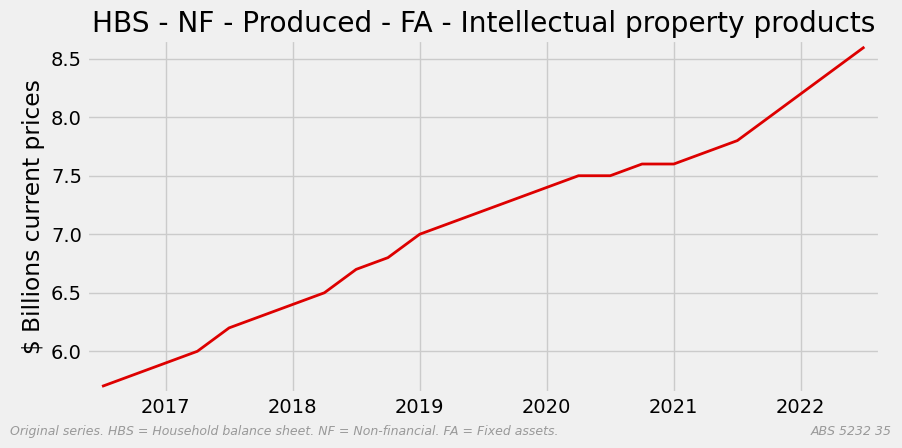

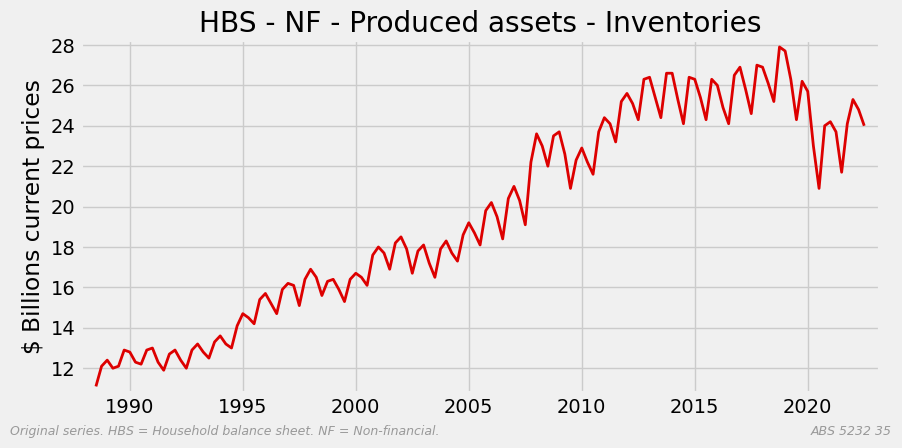

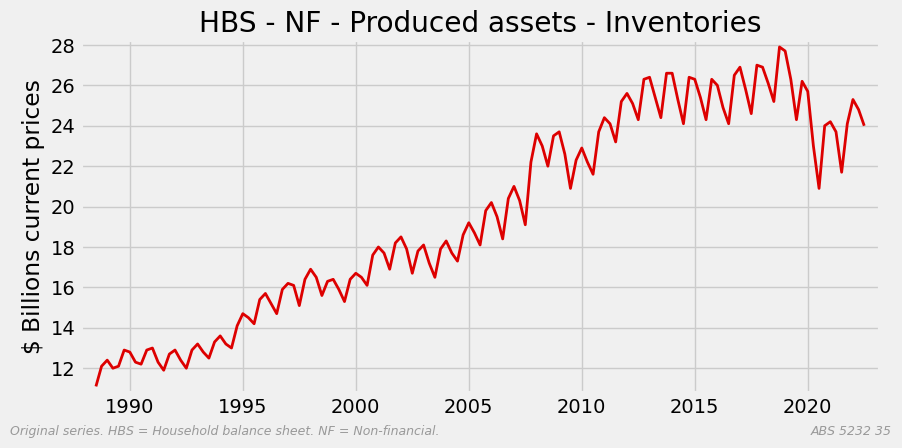

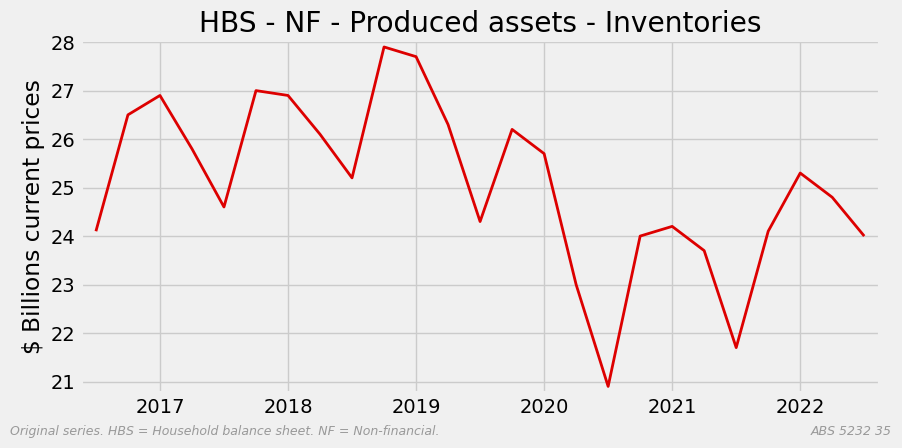

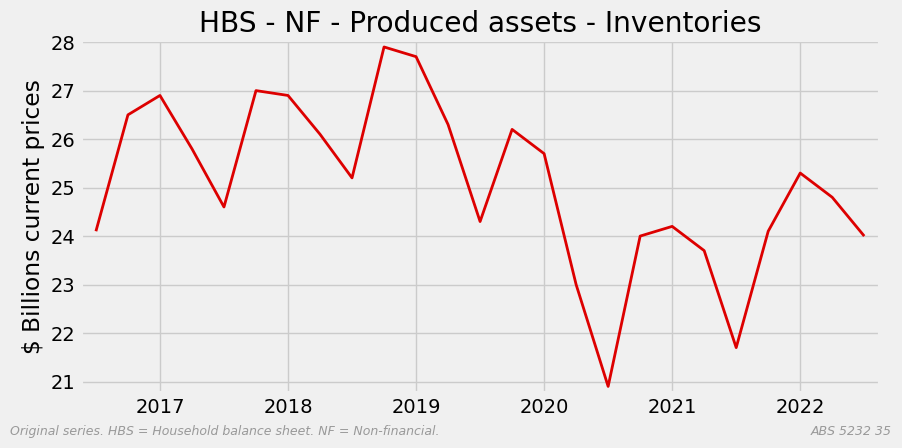

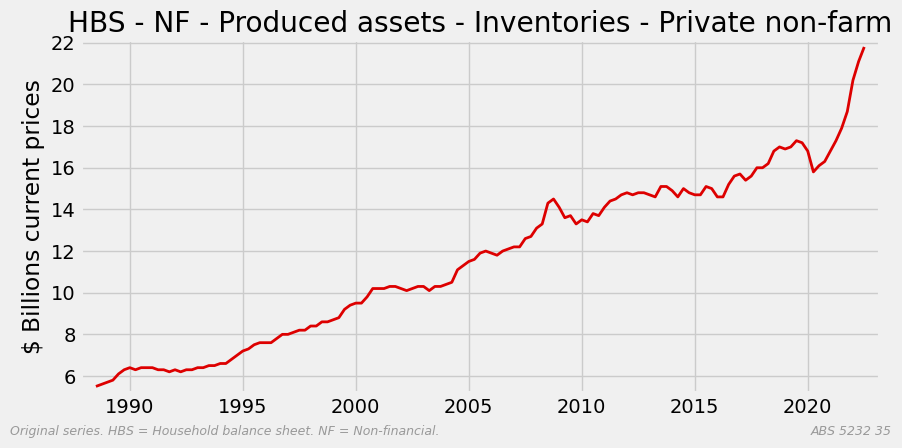

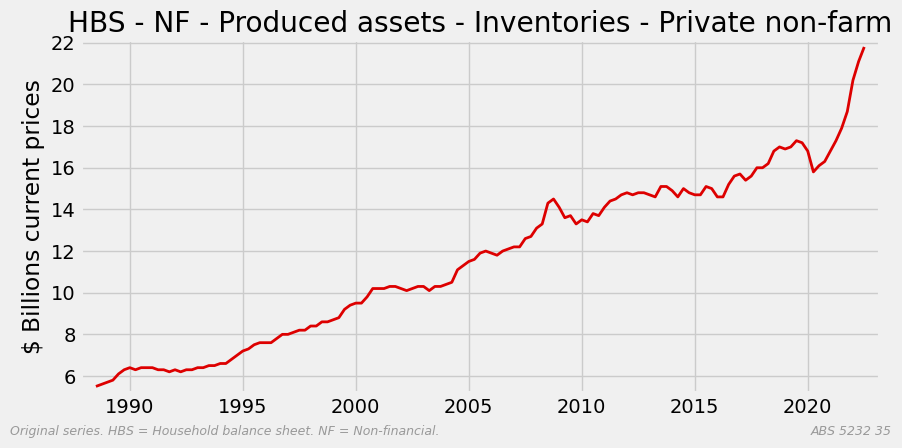

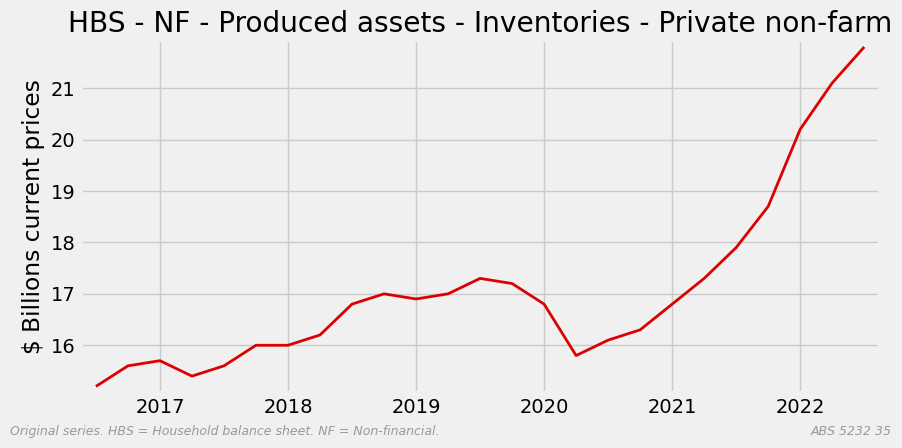

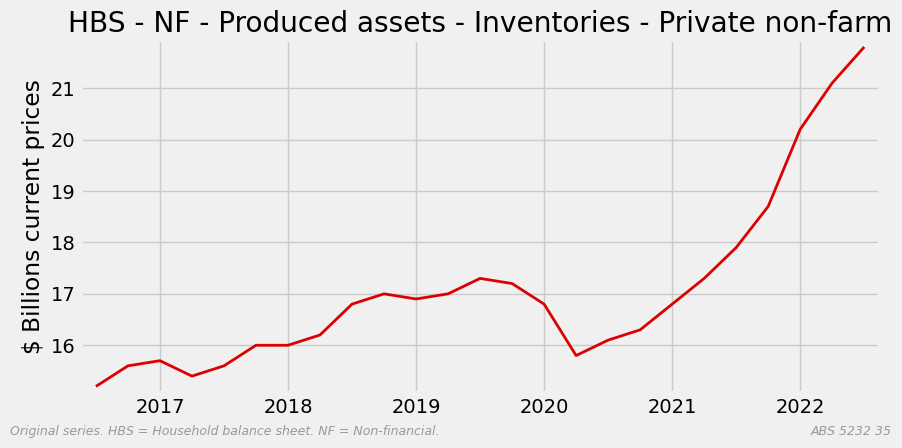

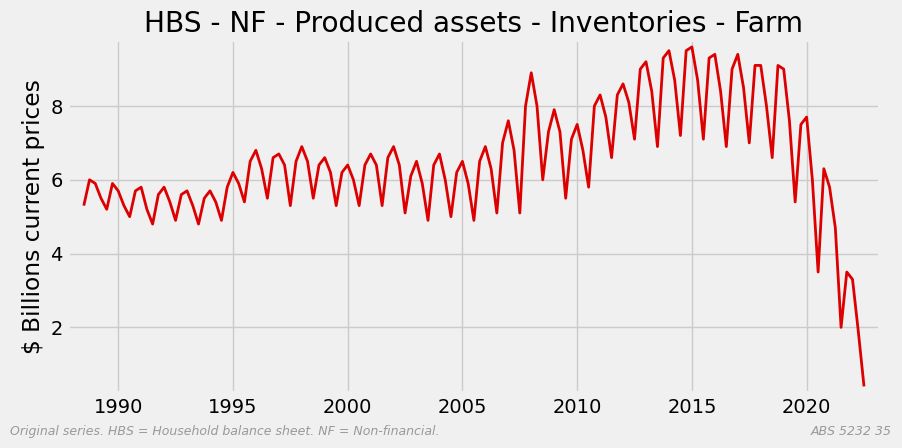

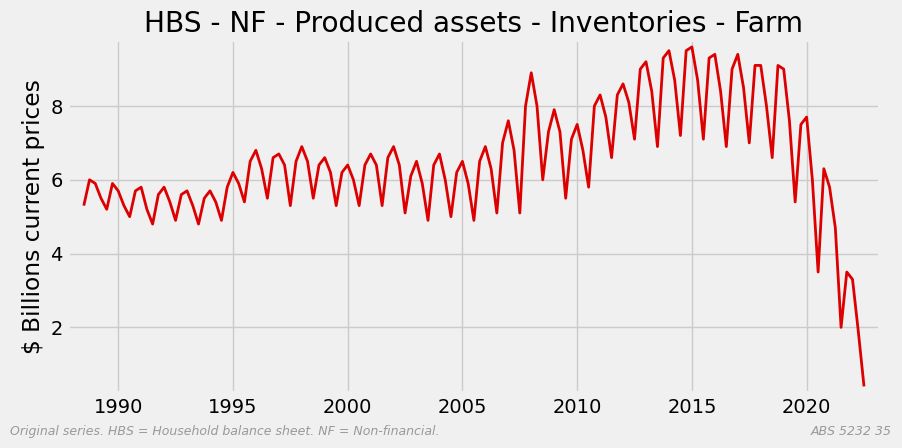

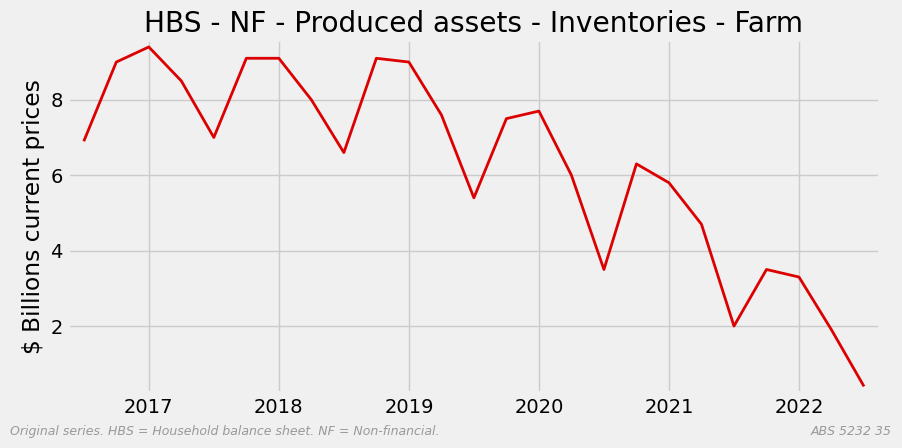

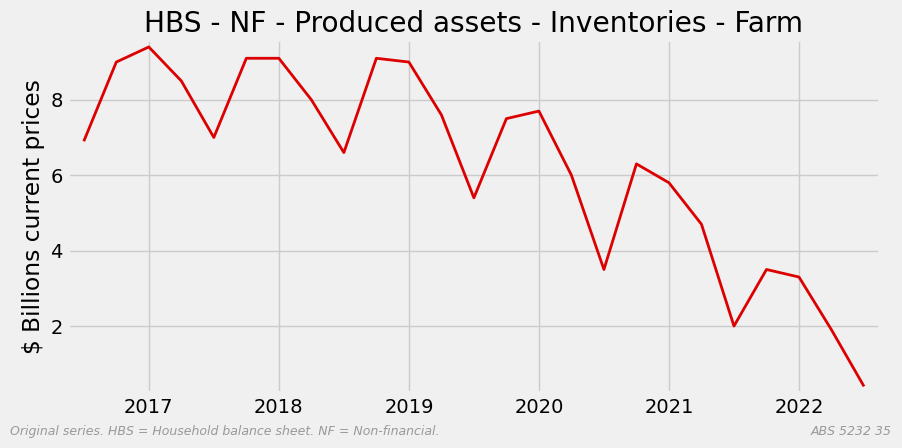

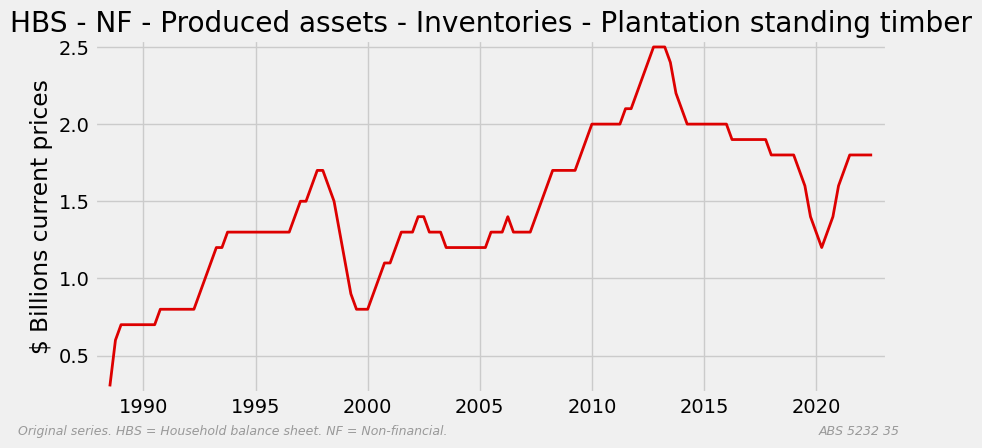

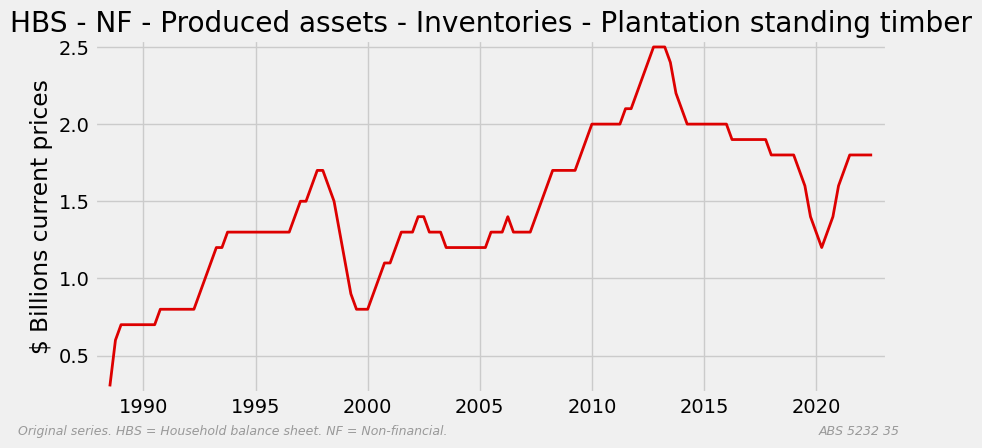

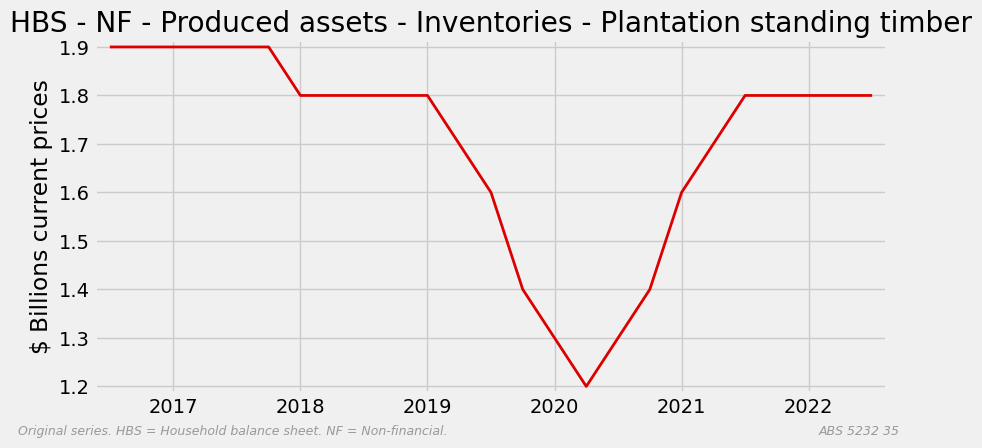

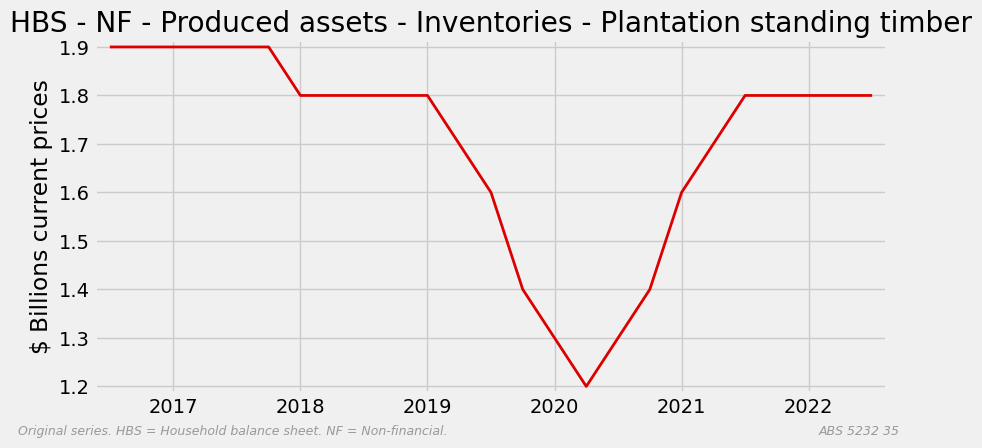

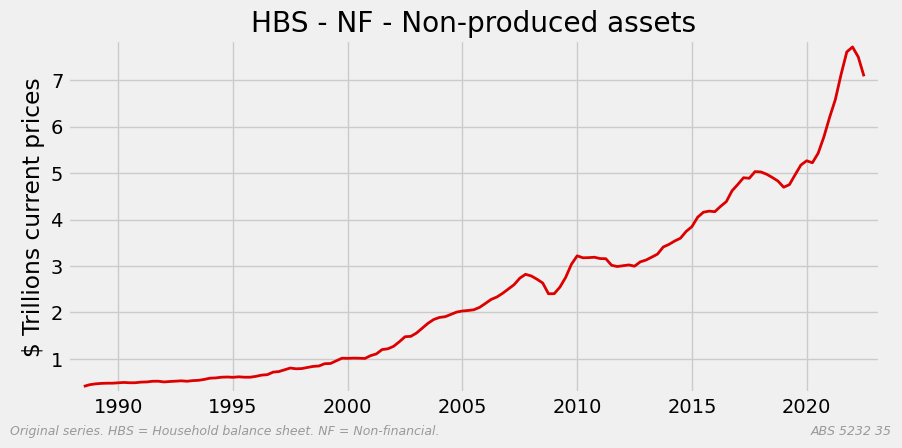

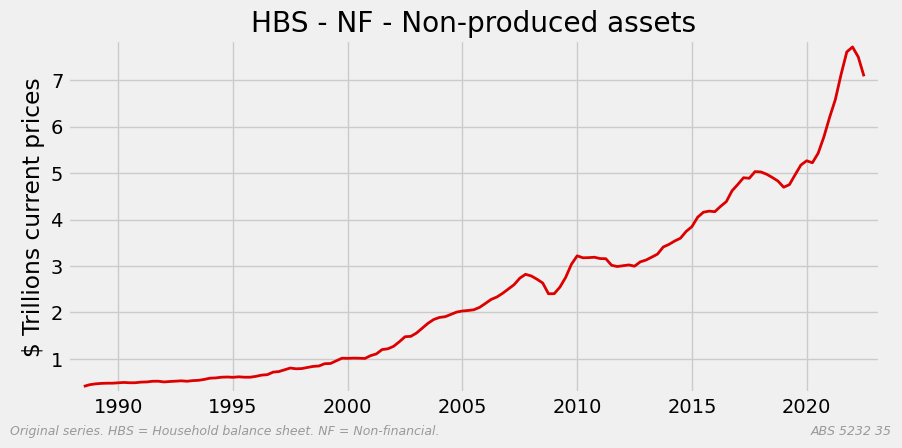

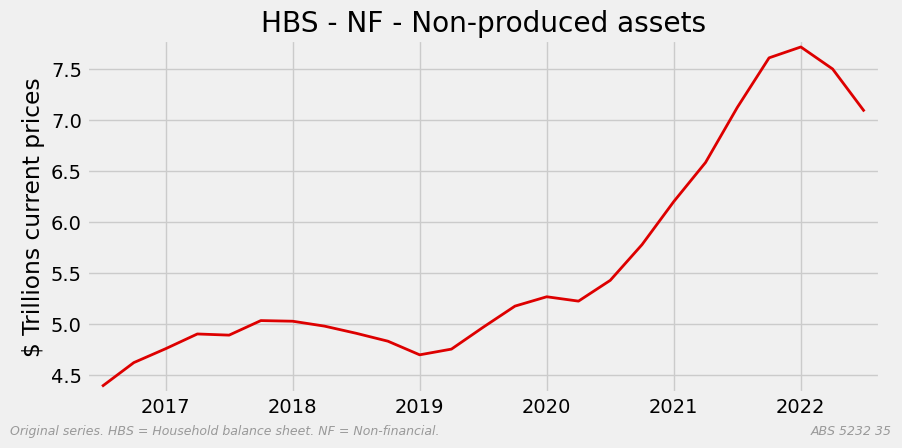

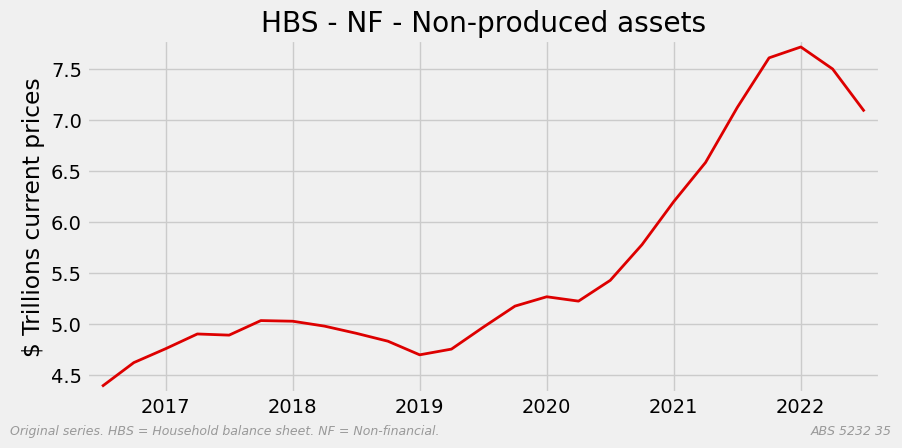

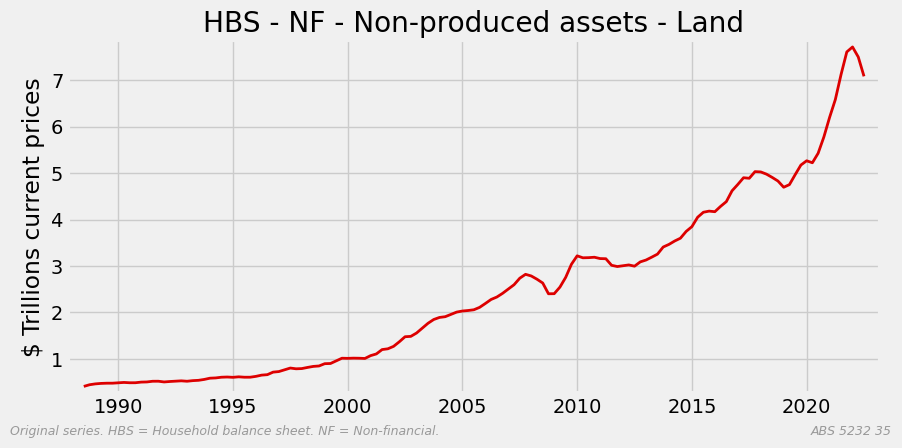

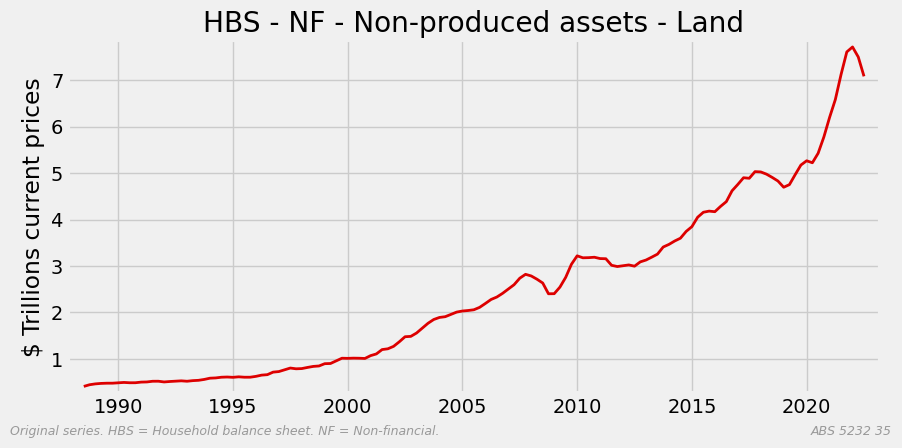

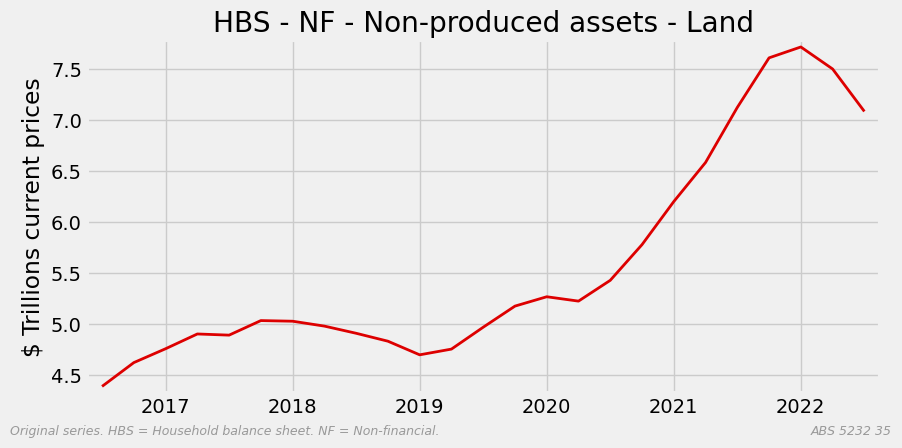

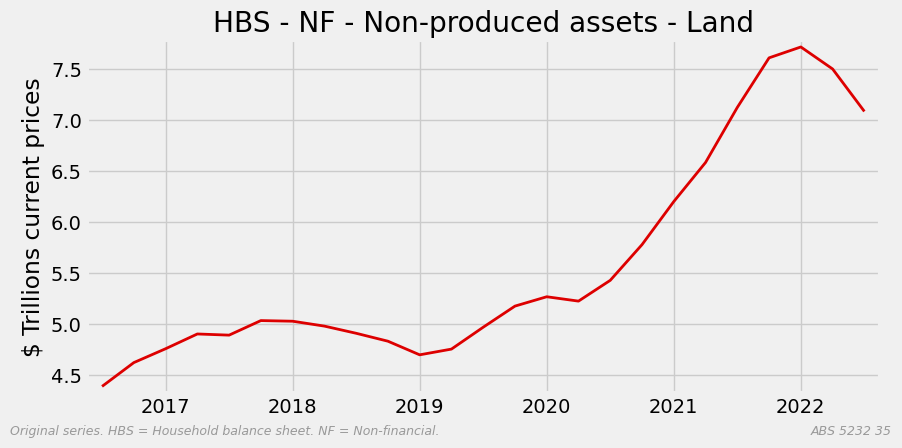

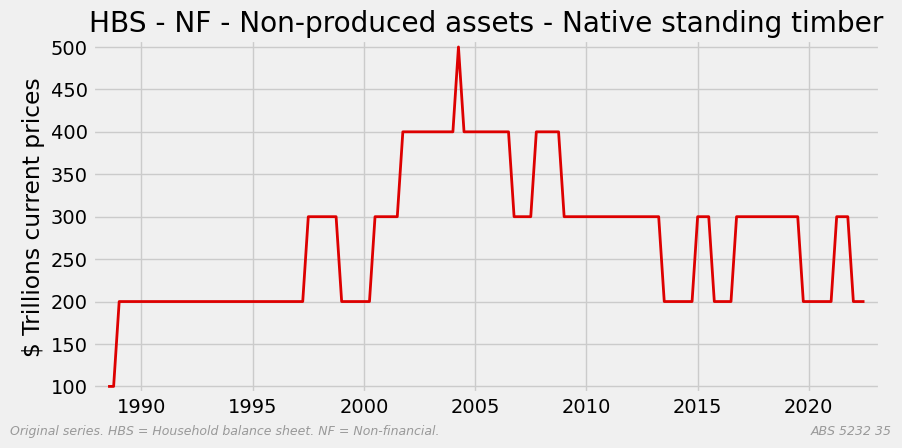

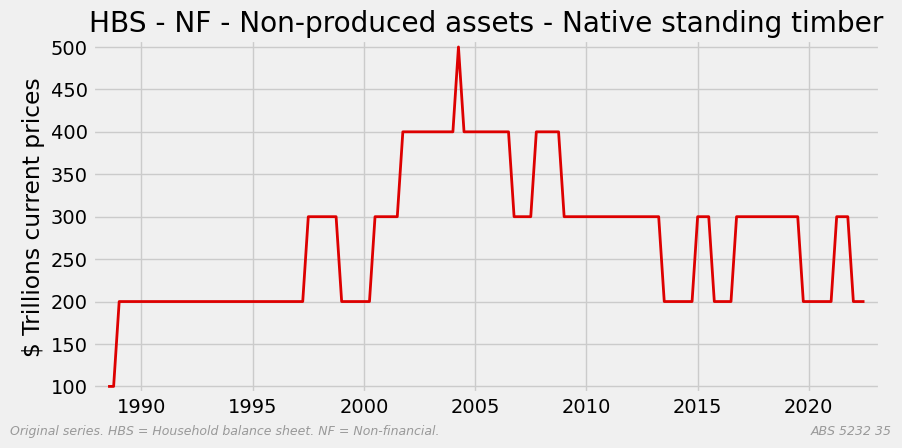

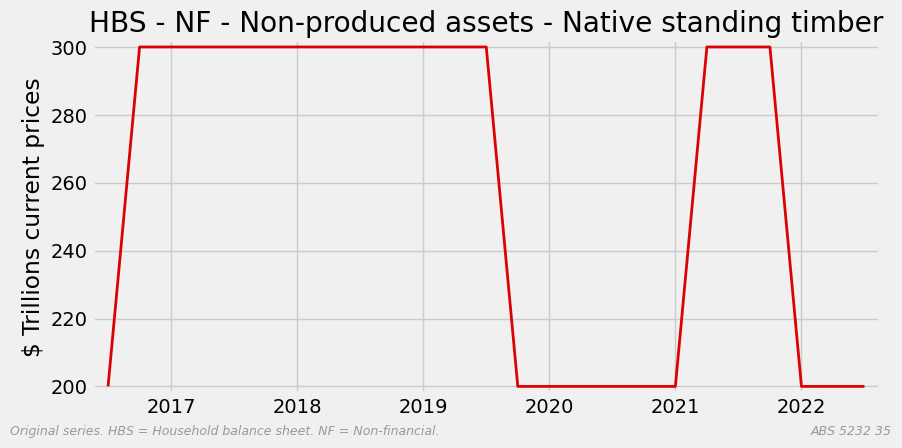

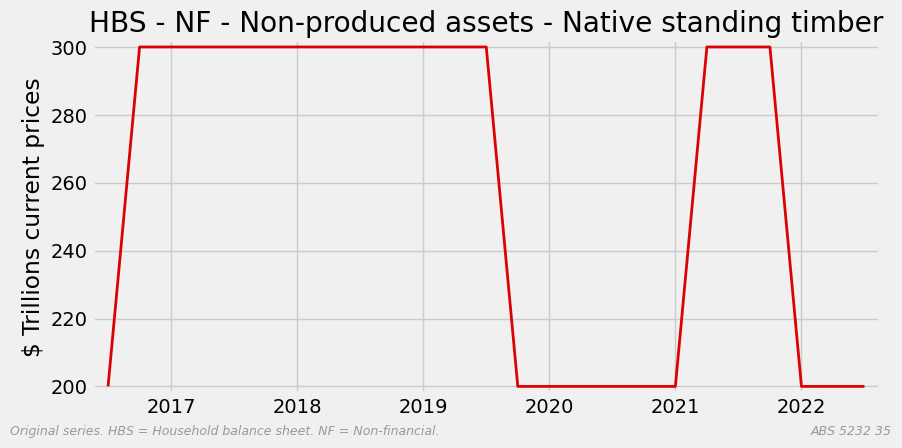

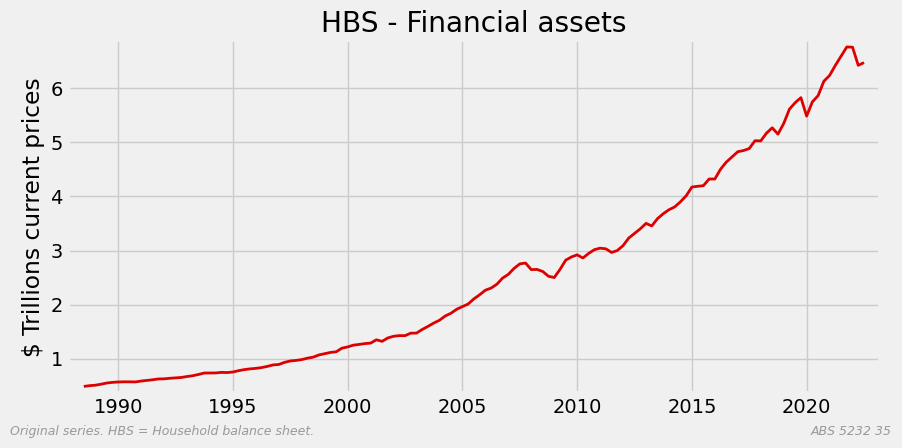

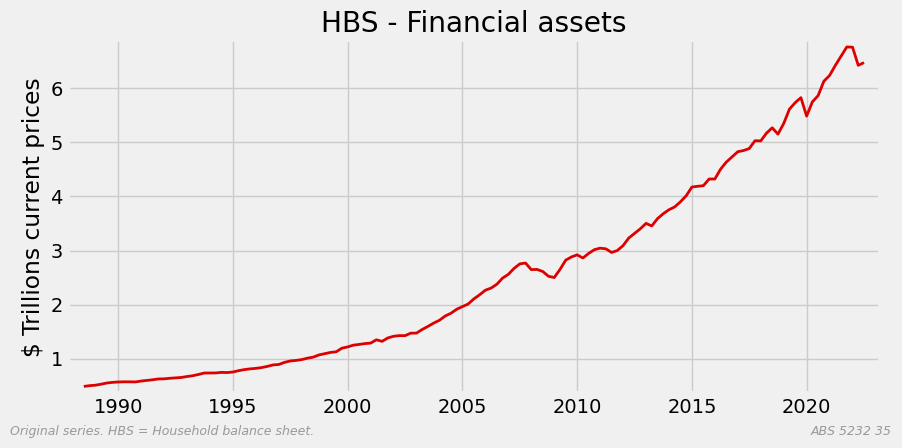

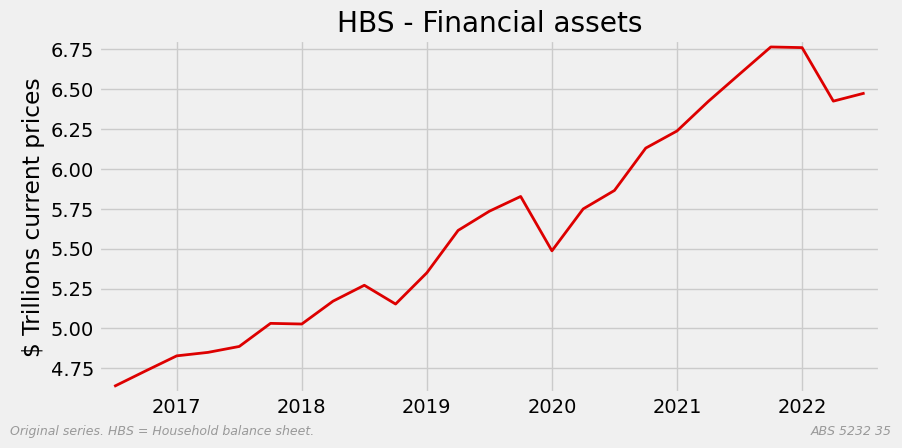

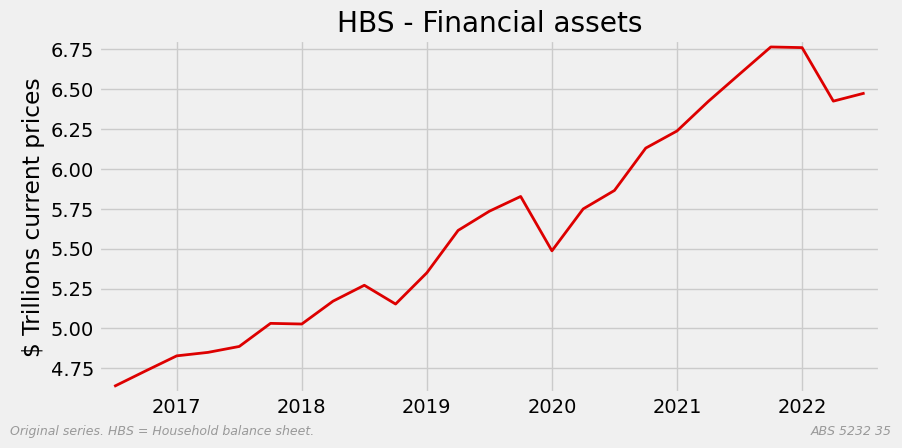

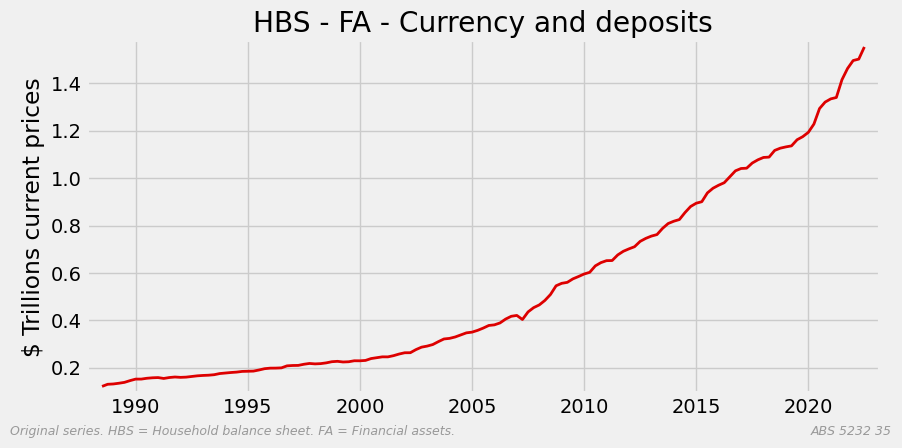

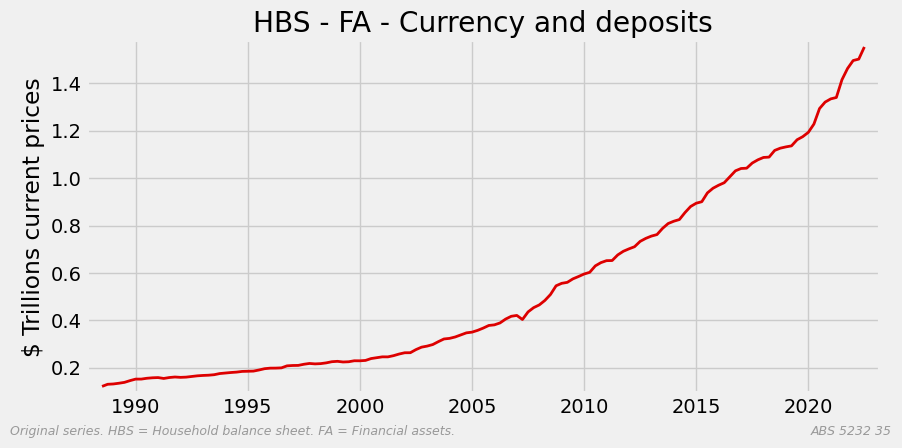

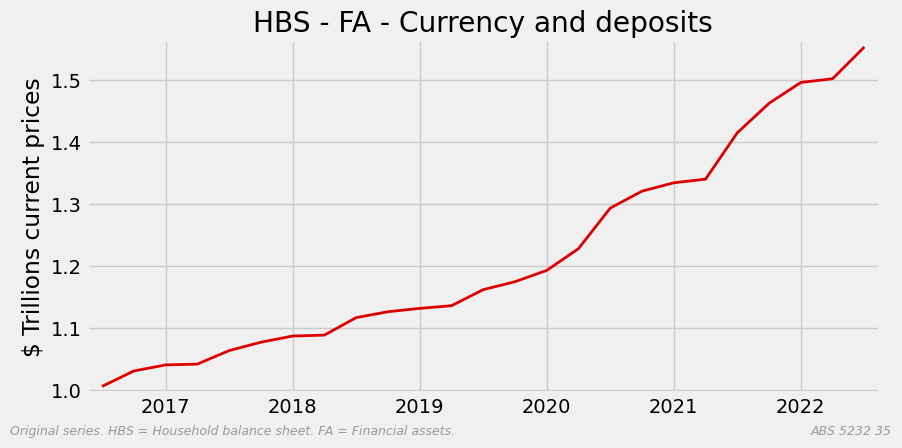

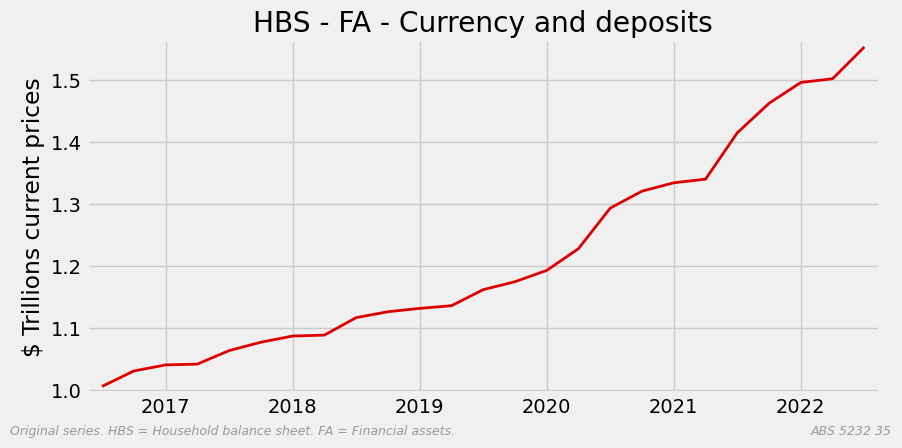

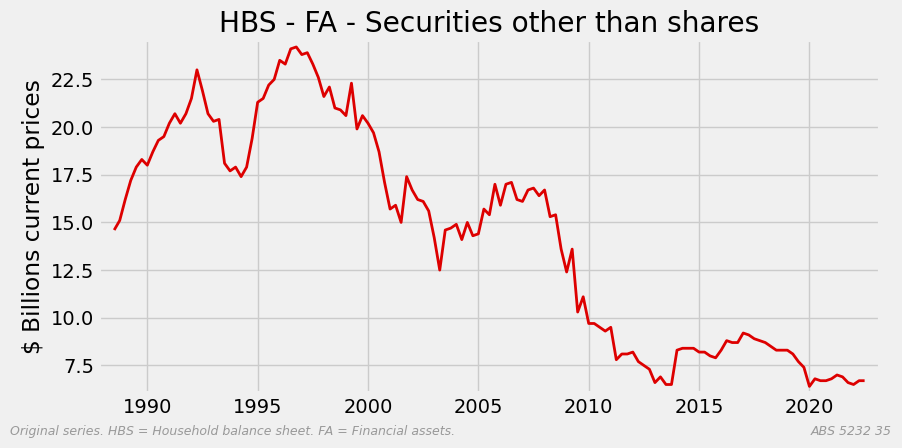

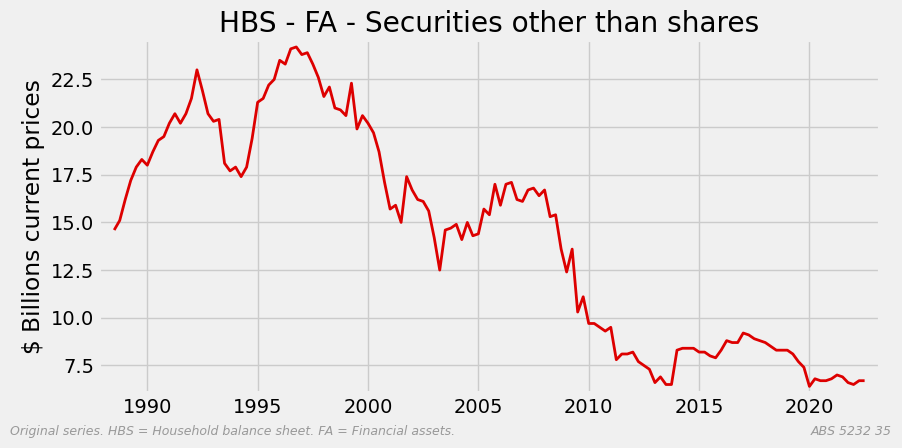

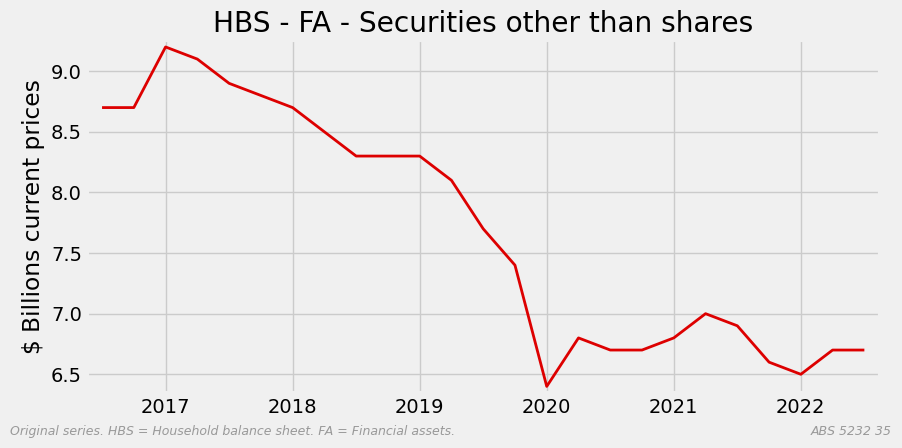

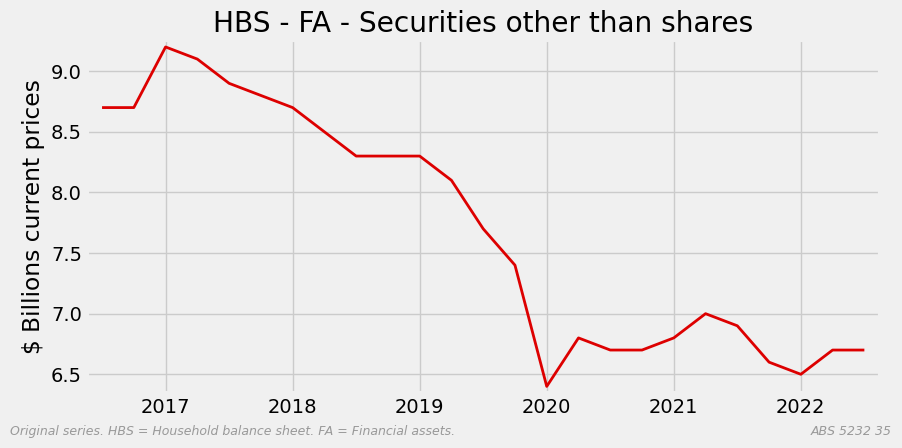

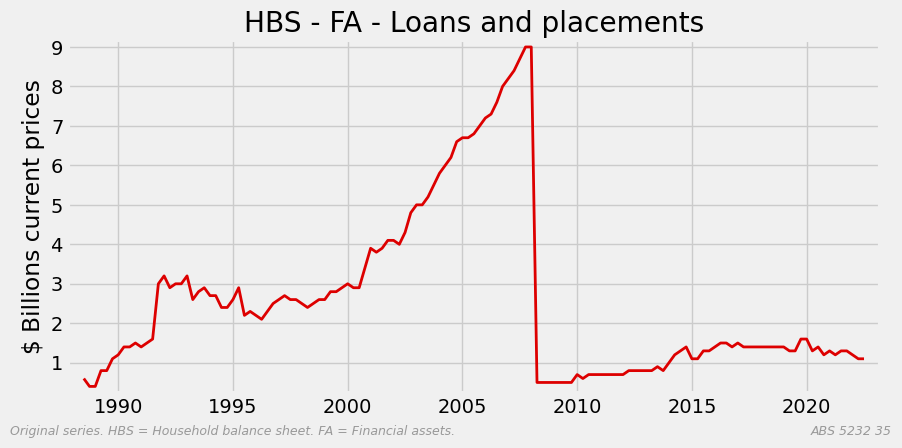

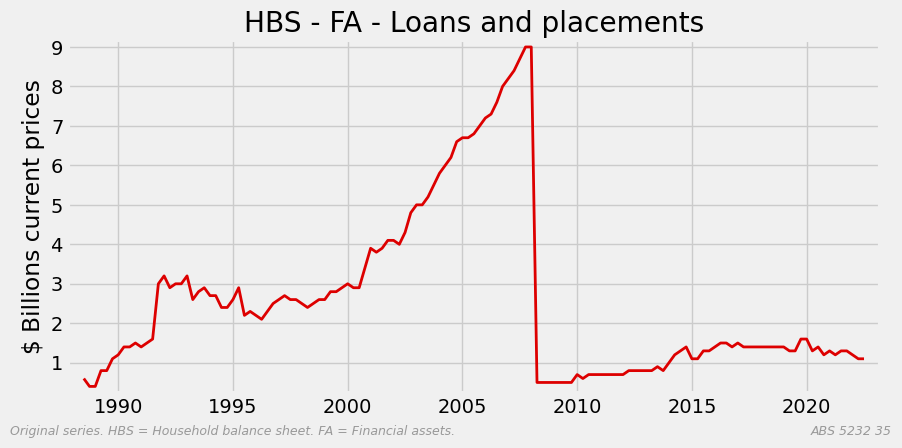

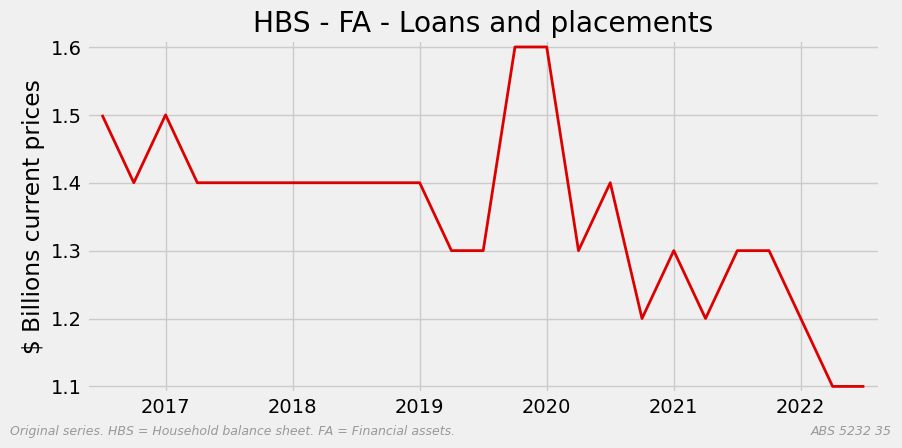

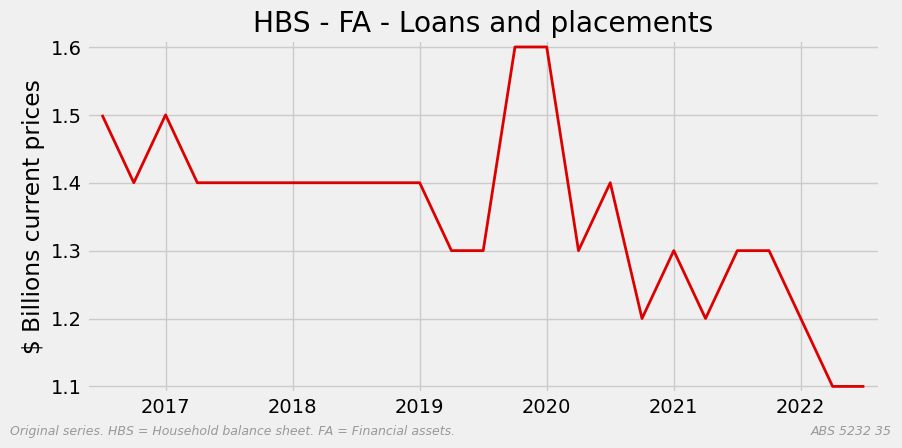

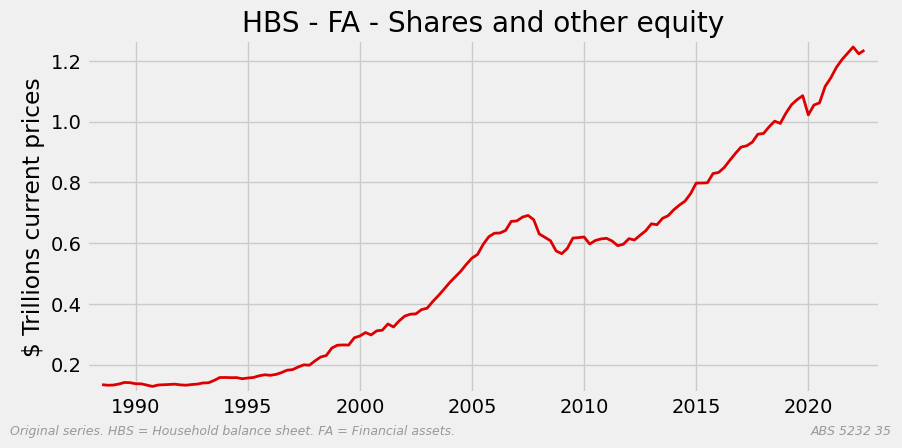

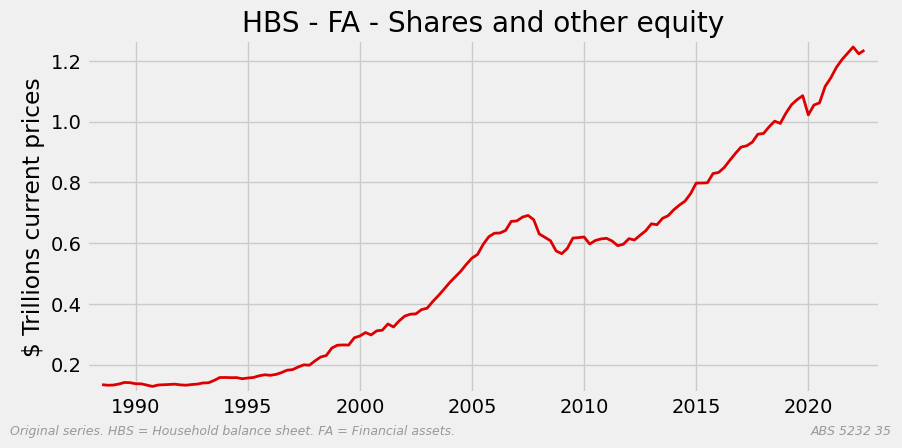

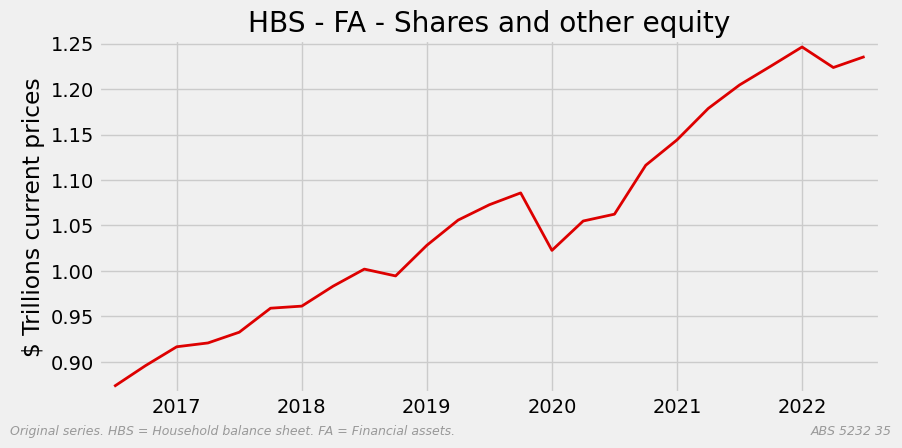

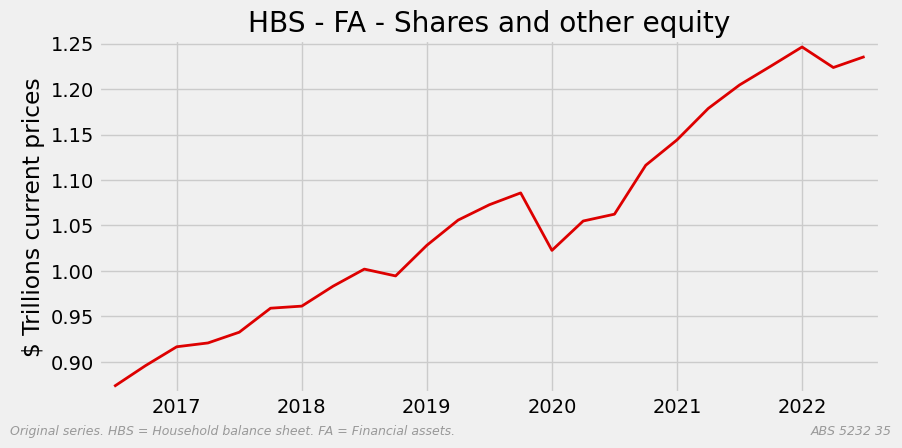

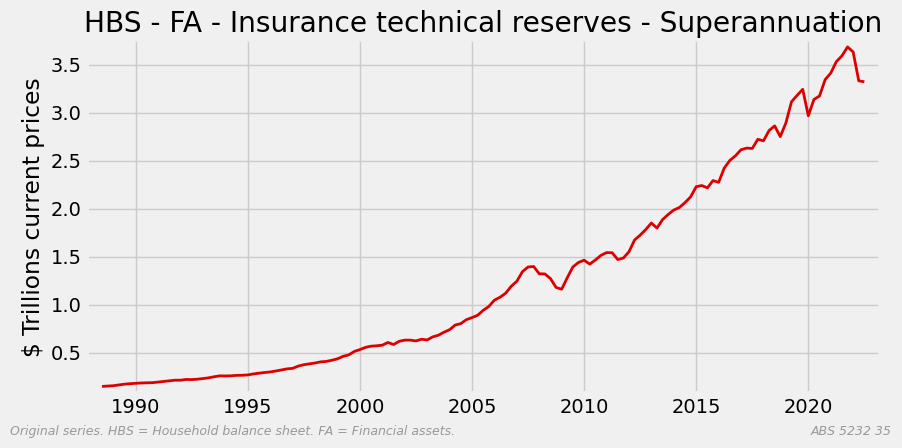

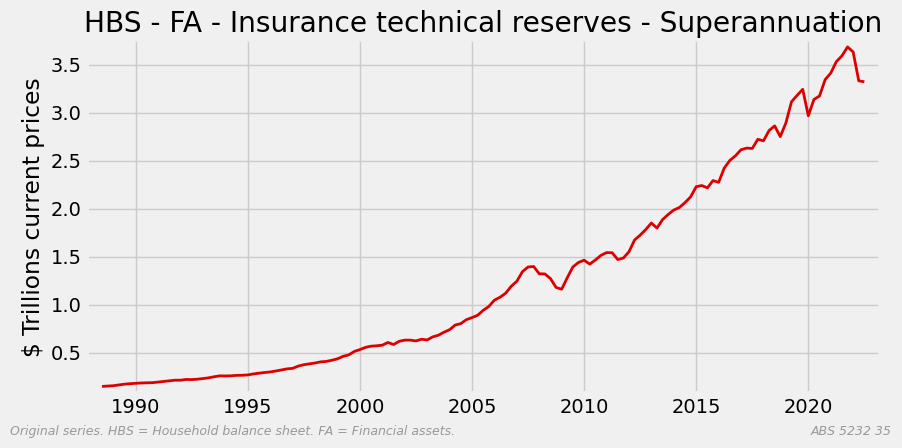

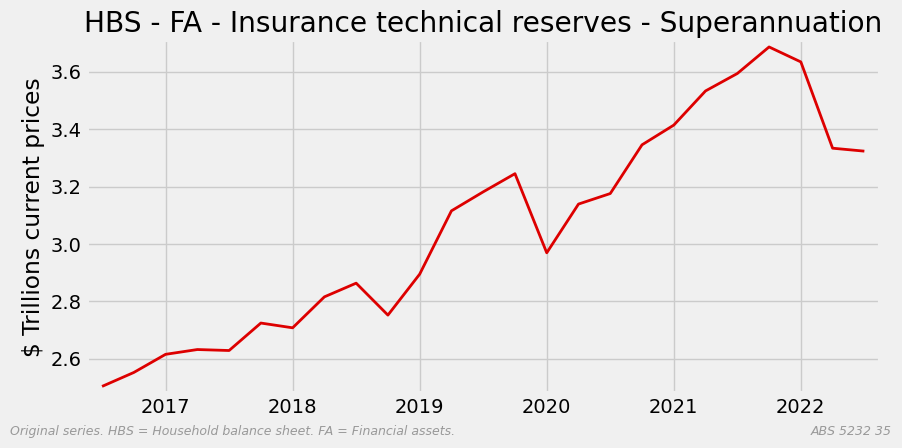

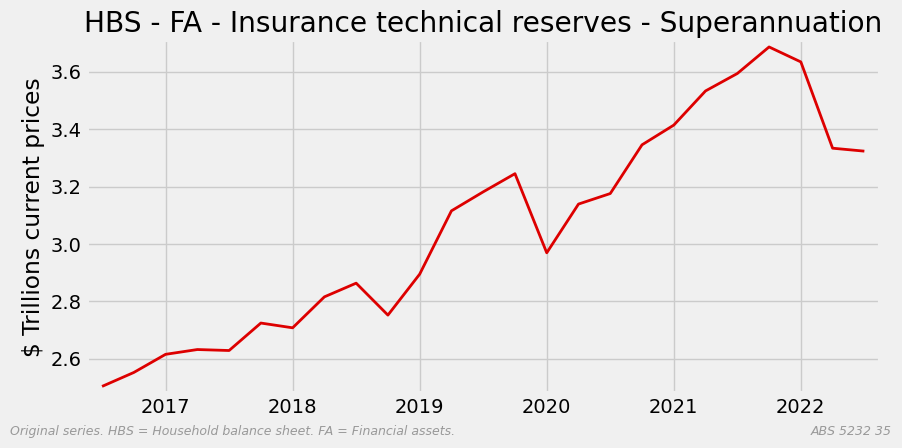

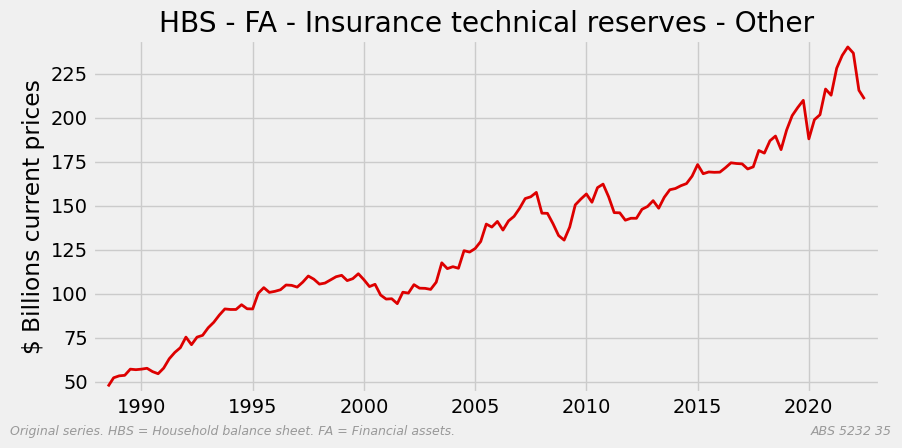

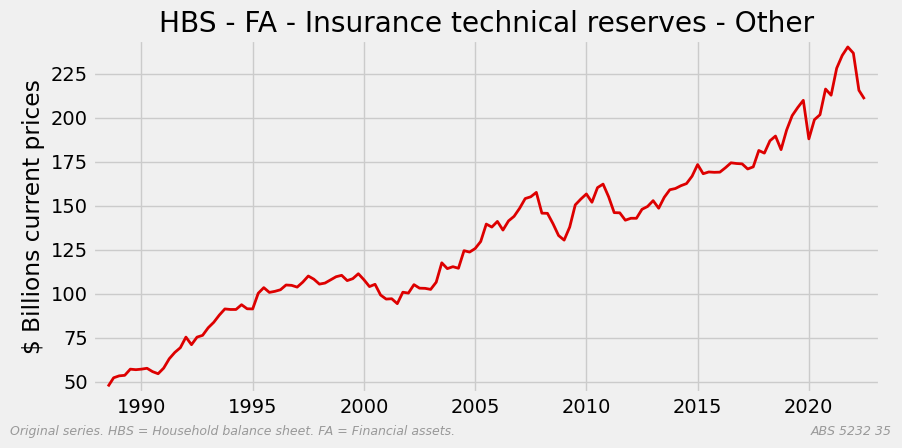

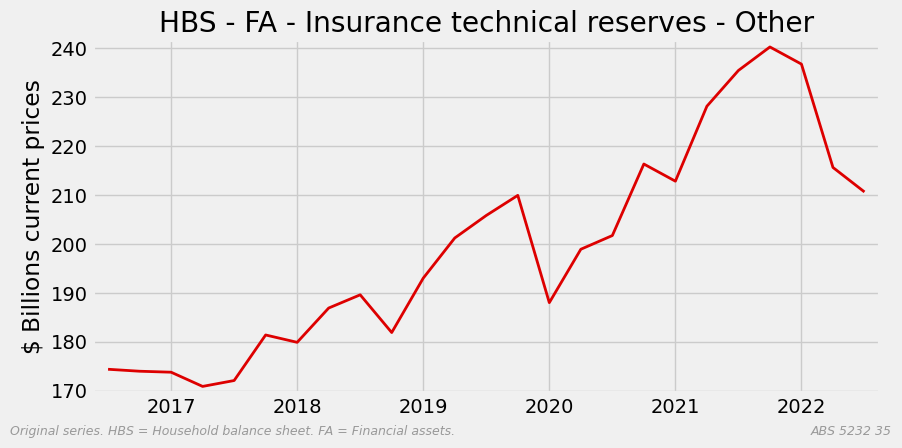

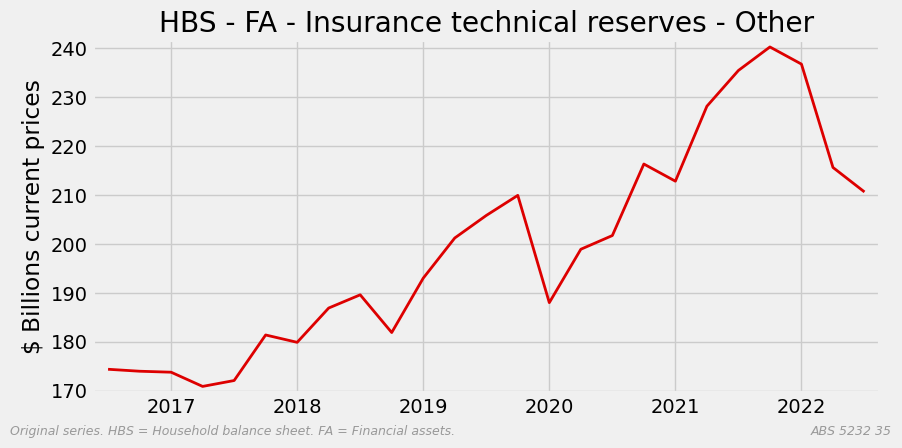

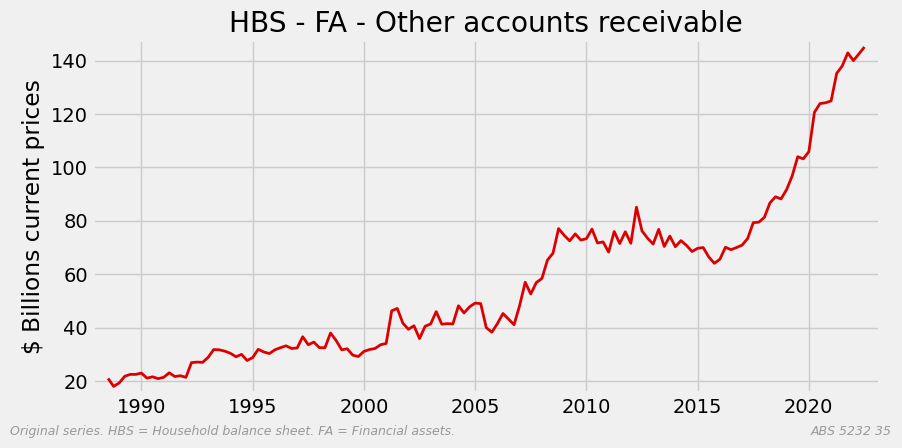

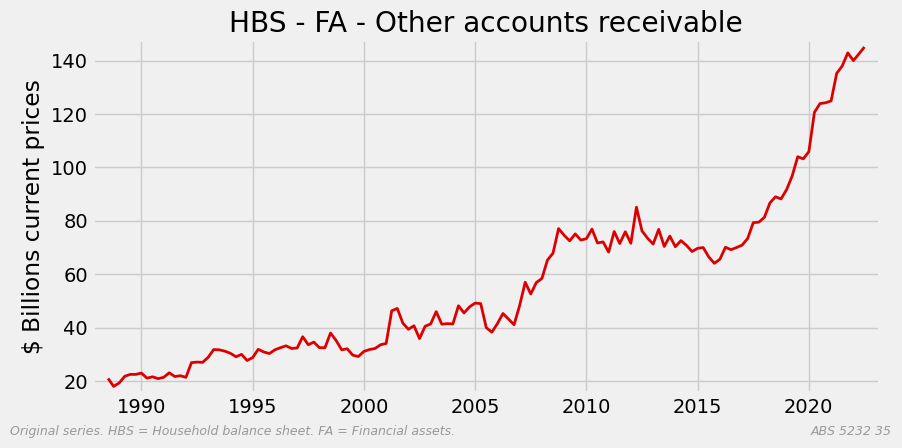

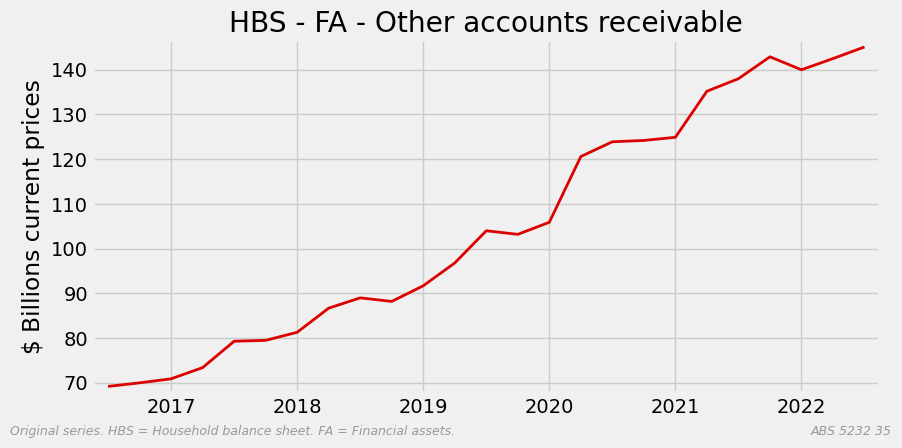

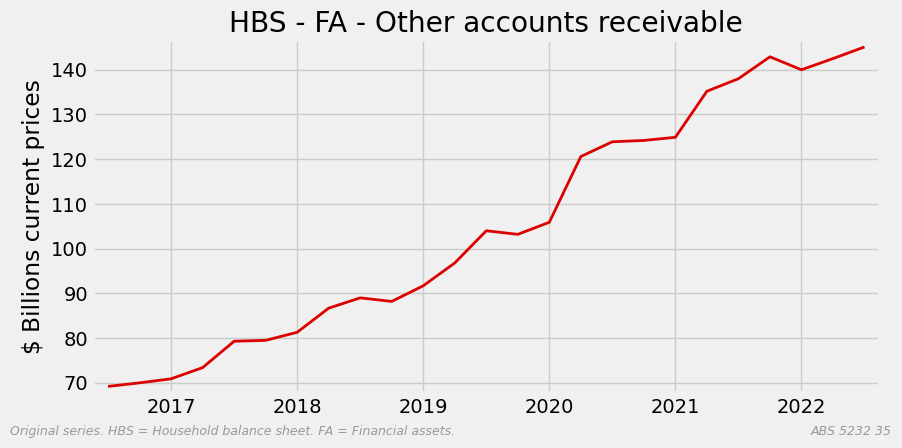

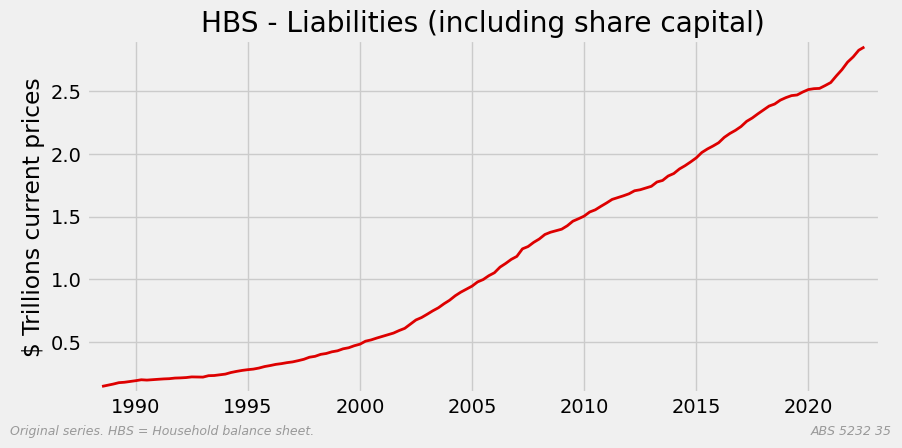

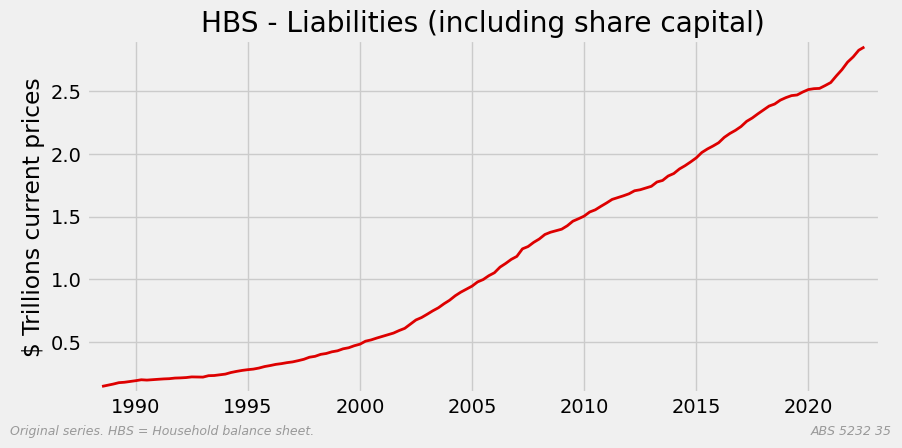

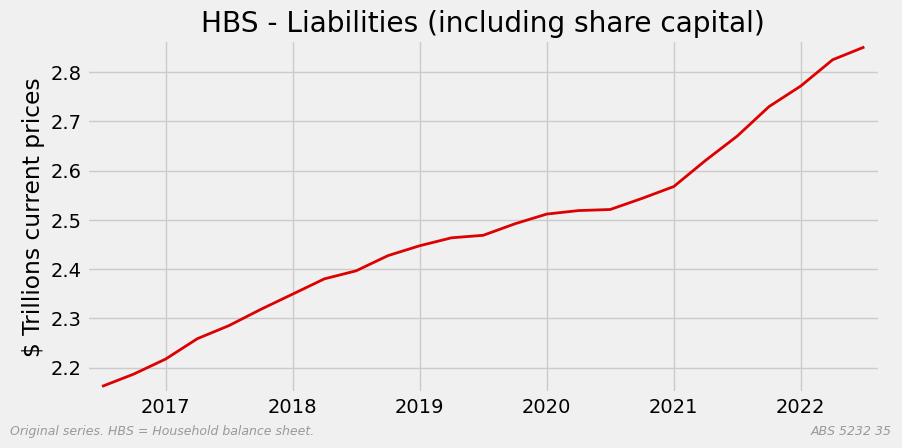

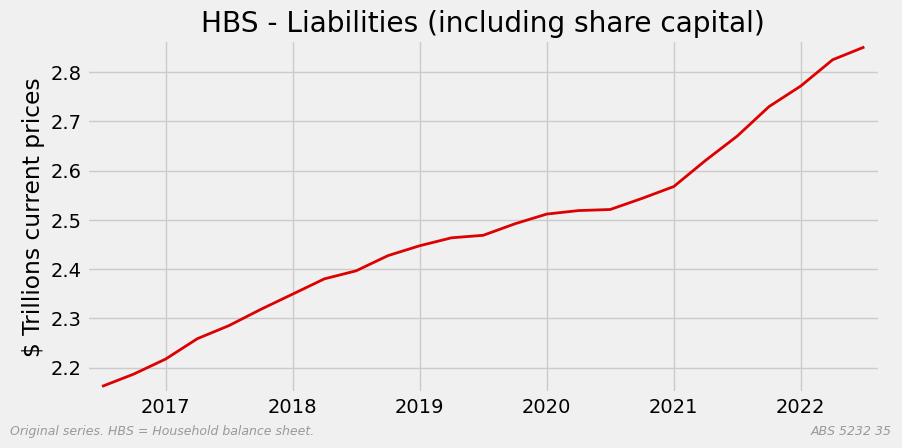

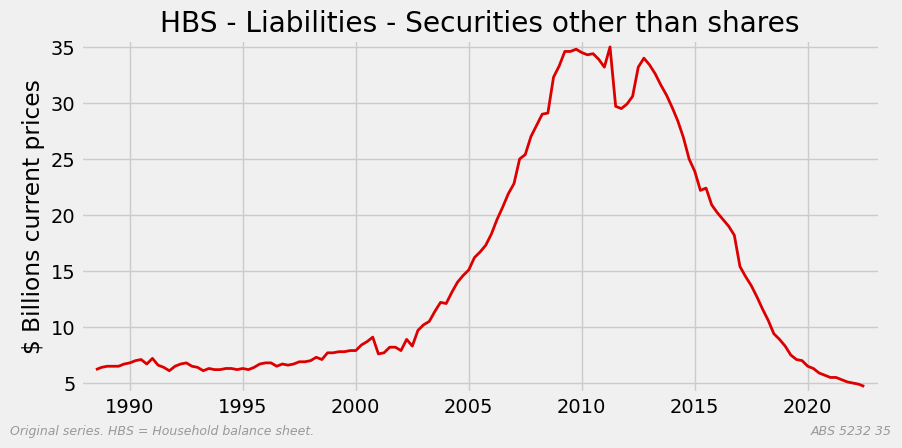

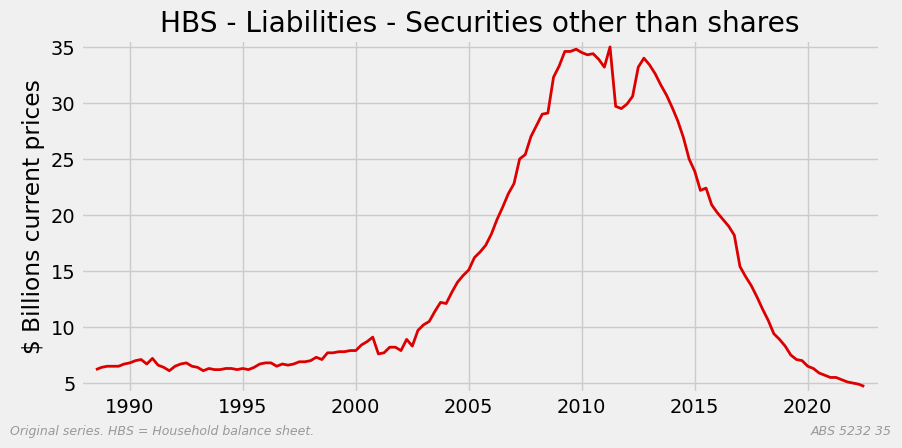

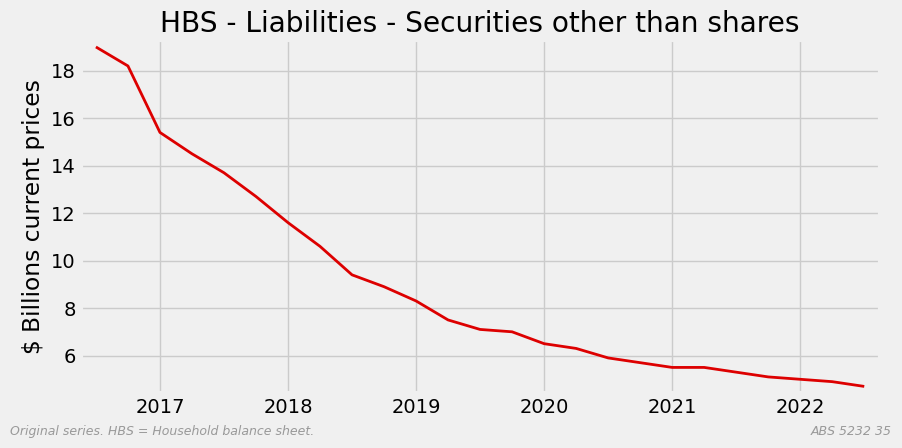

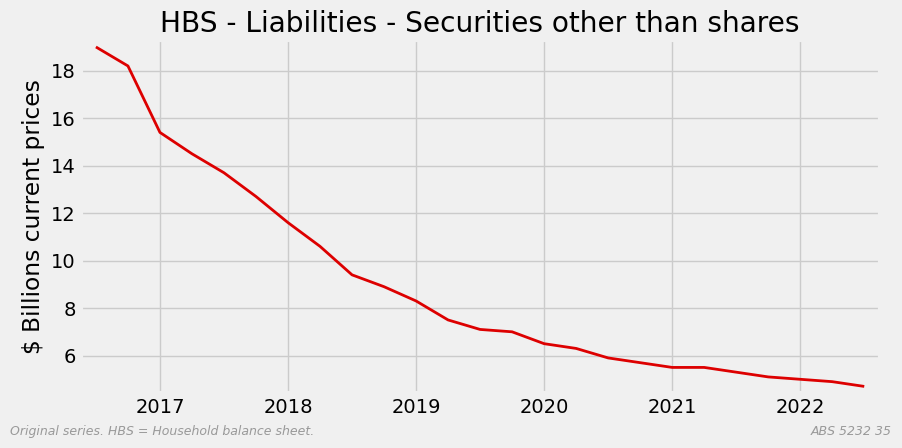

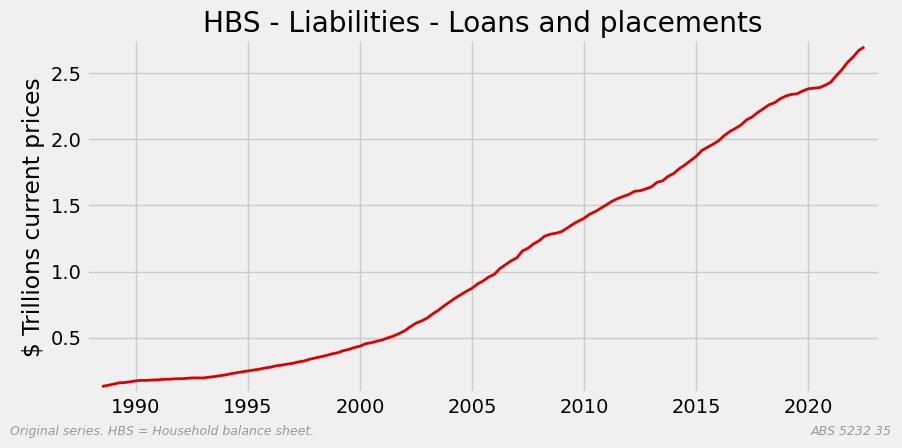

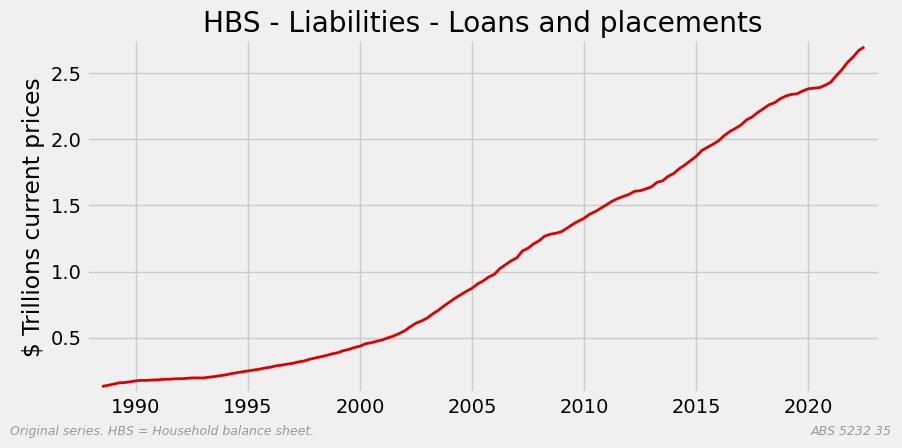

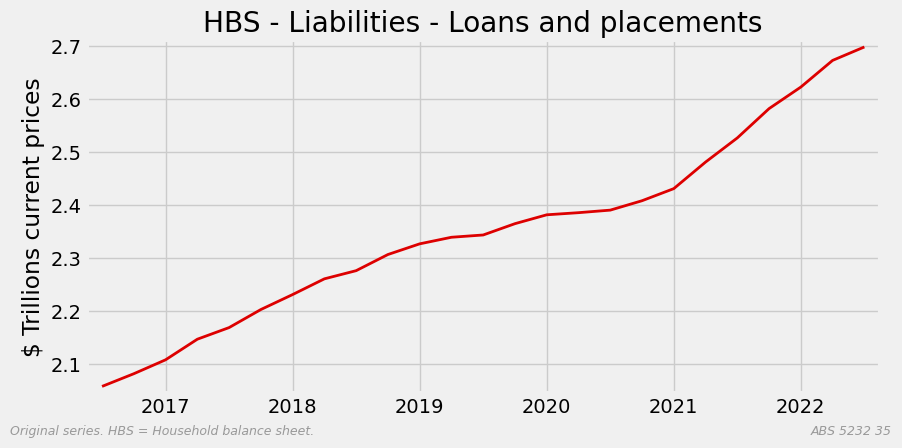

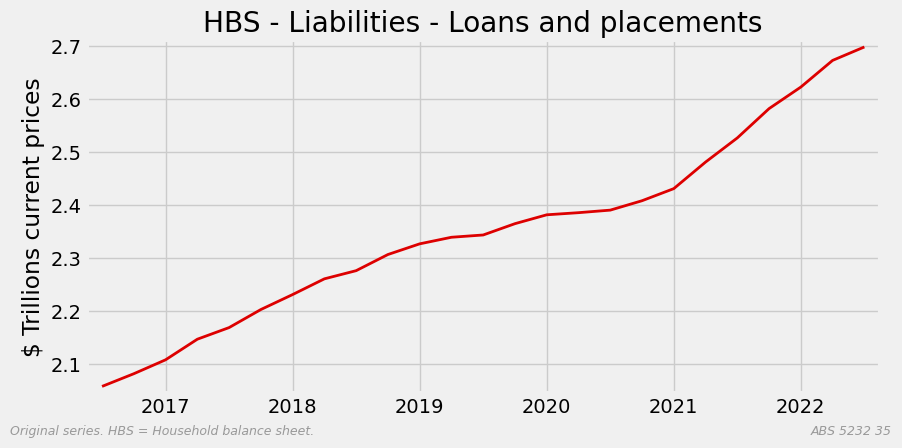

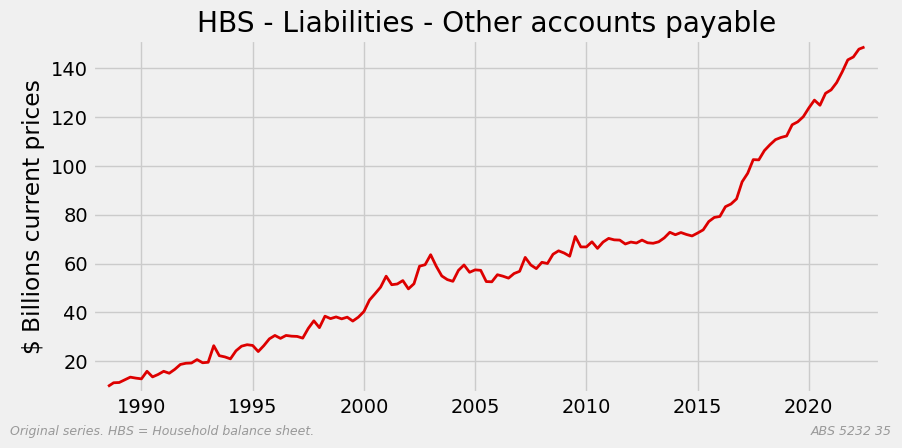

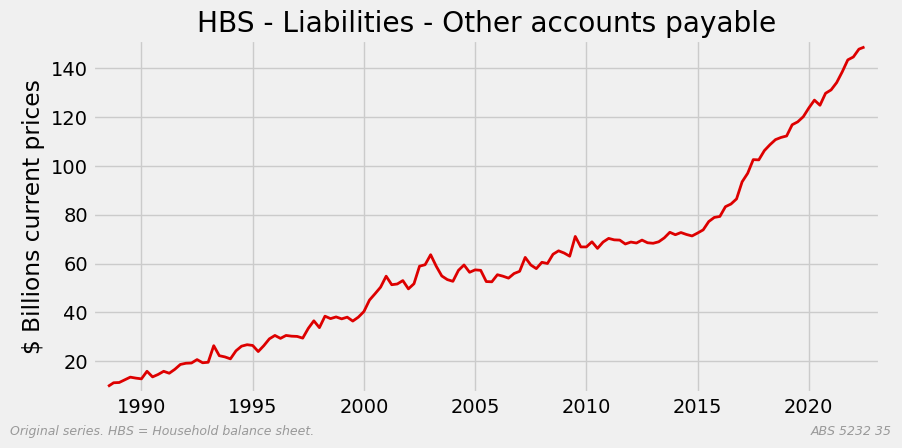

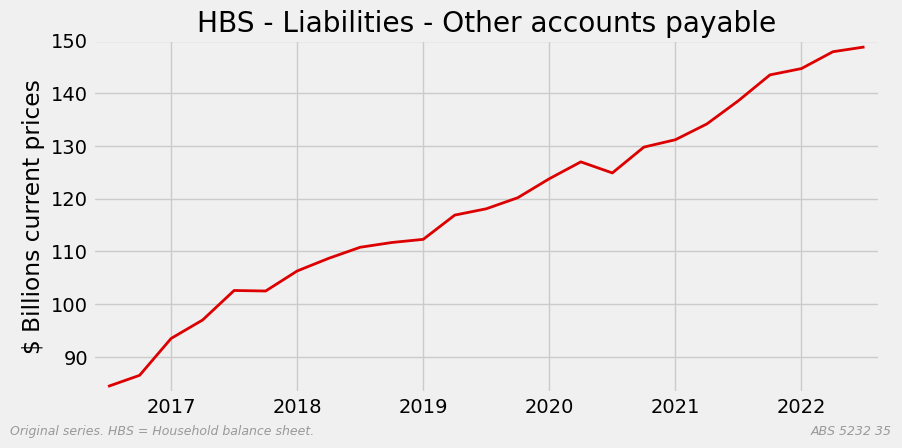

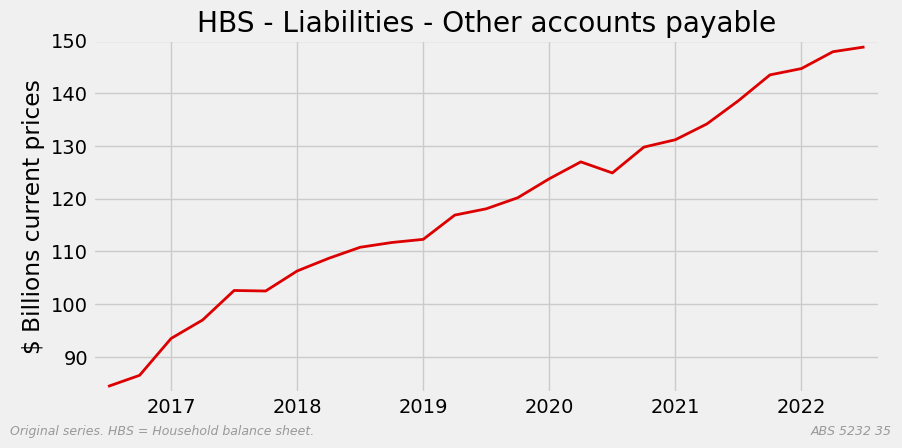

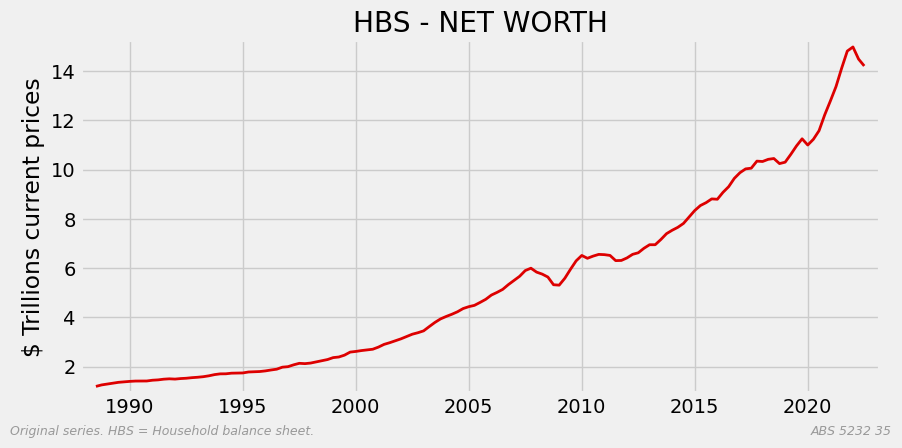

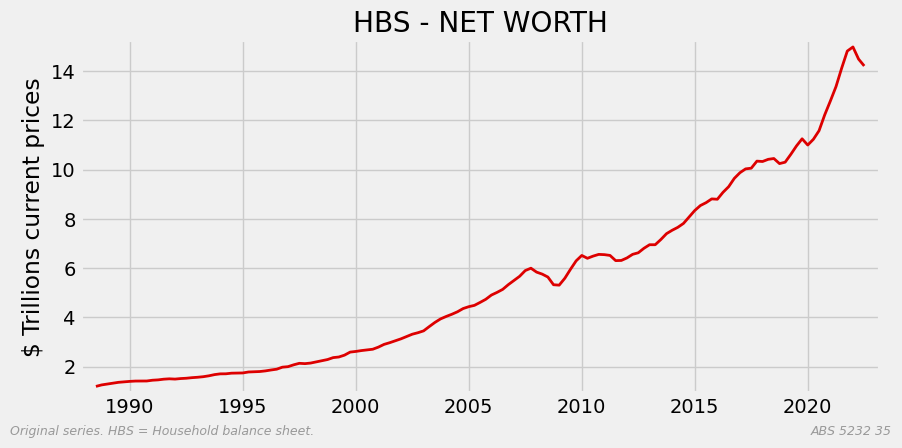

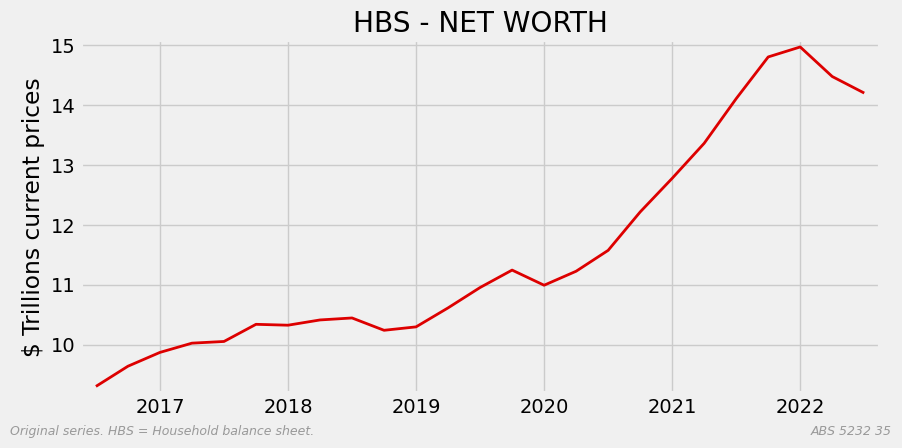

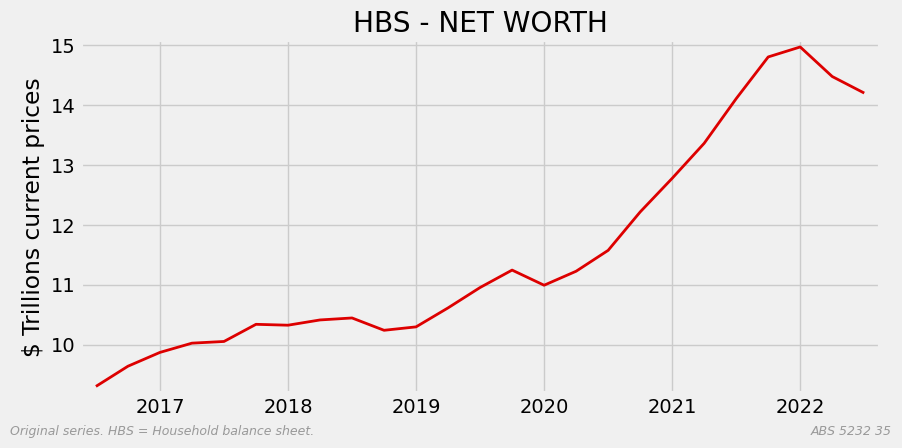

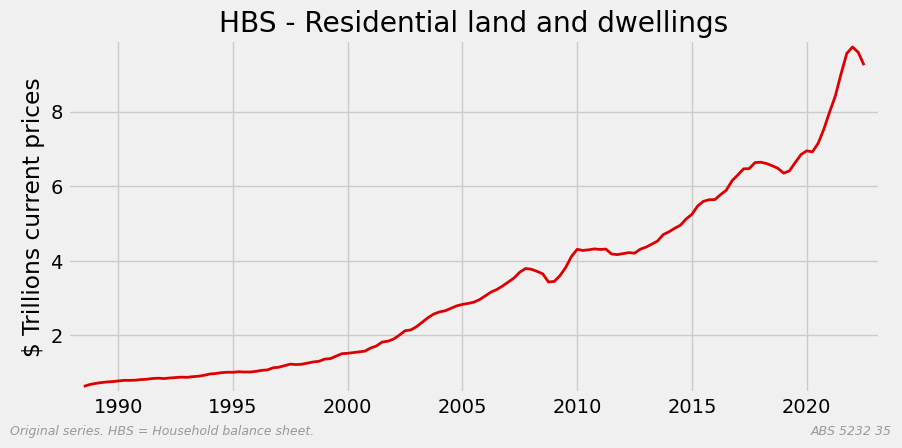

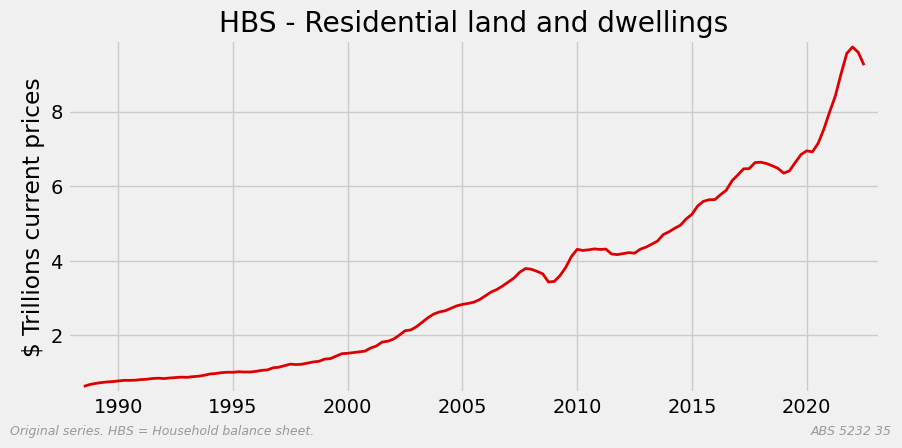

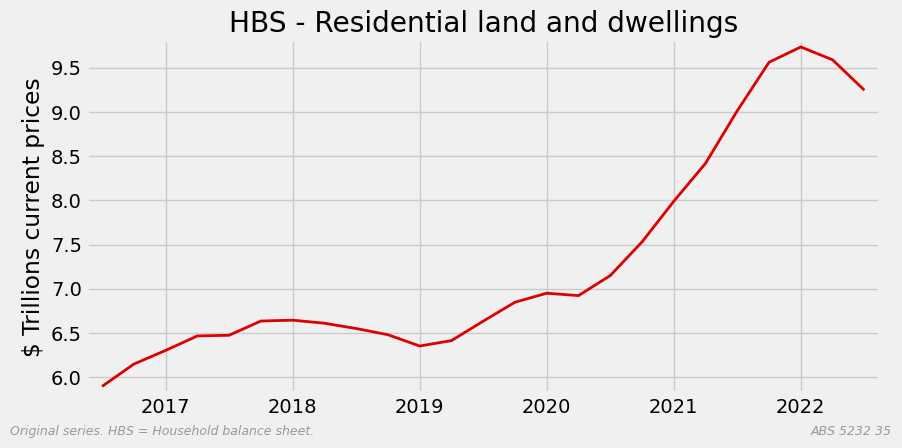

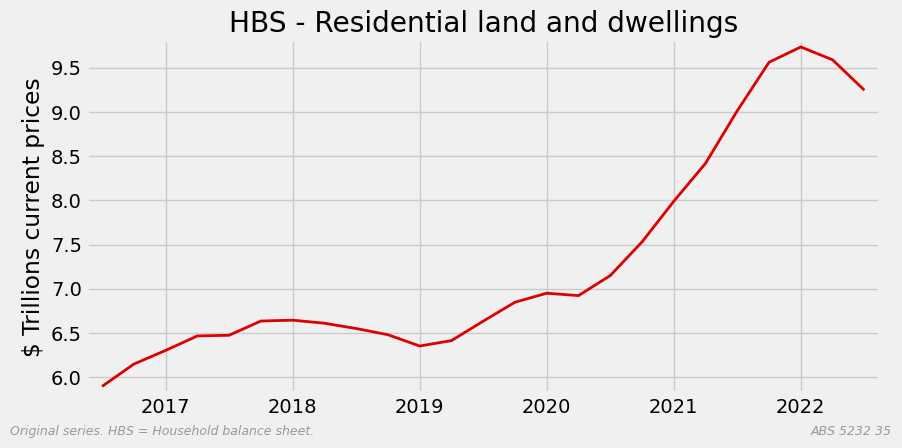

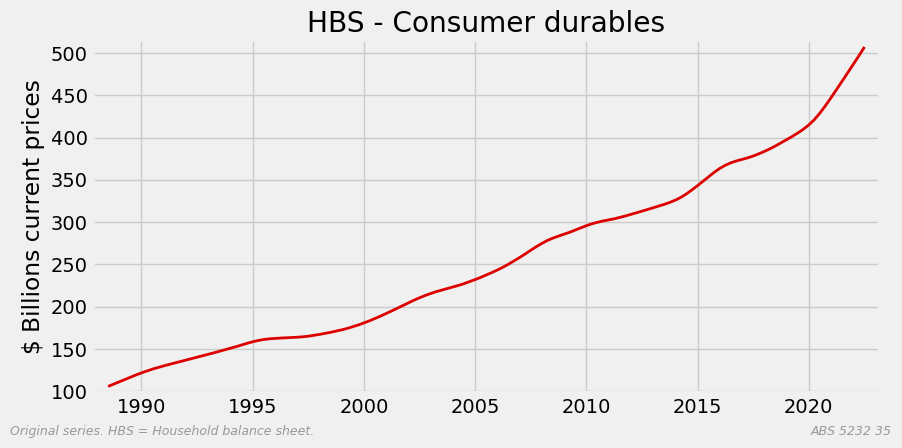

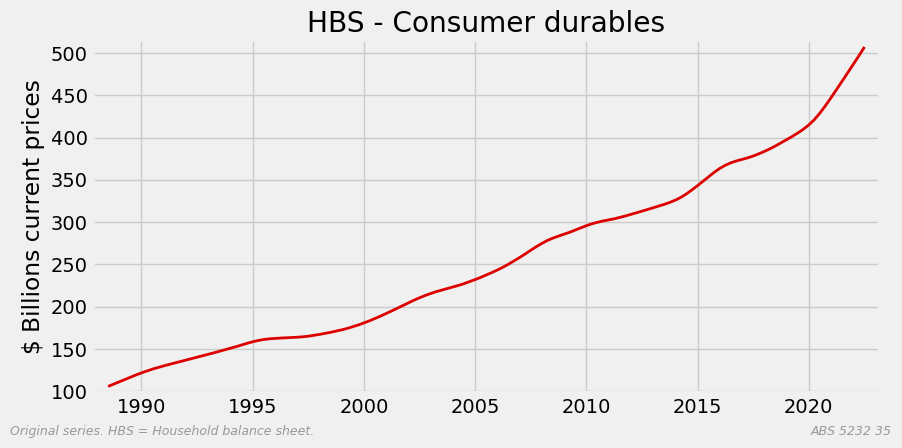

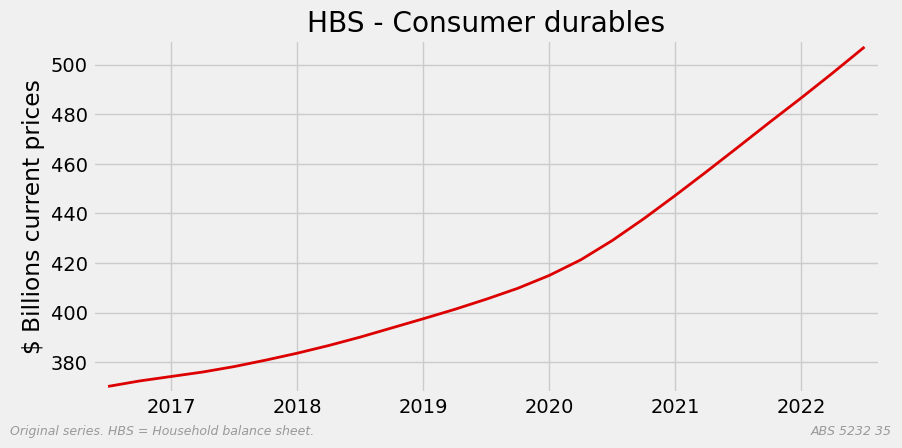

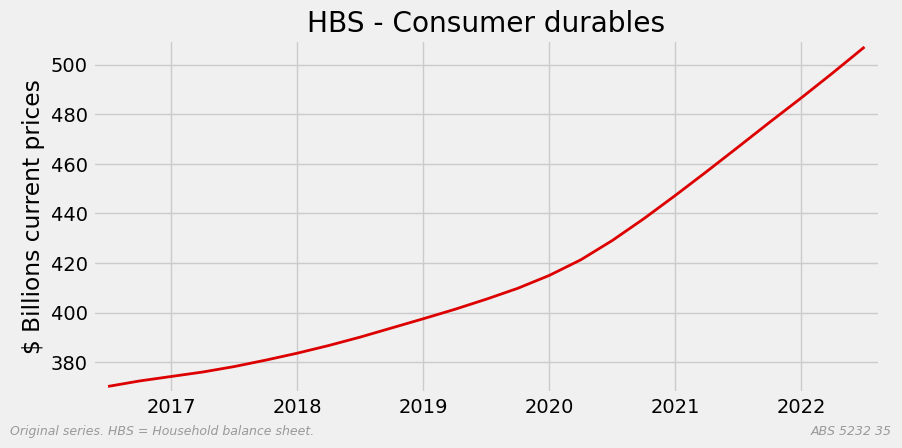

In [8]:
table = '35'
data = abs_dict[table]
series_type = 'Original'
plots = meta[
    meta['Table'] == table
]['Data Item Description']

for plot in plots:
    ident, orig_units = get_identifier(meta, plot, series_type, table)

    title = f'HBS - {plot[:-2]}'
    footnote = ''
    replaceable = {
        '- Non-financial -': ['- NF -', ' NF = Non-financial.'],
        '- Fixed assets -': ['- FA -', ' FA = Fixed assets.'],
        '- Financial assets -': ['- FA -', ' FA = Financial assets.']
    }
    for foundling, [replacement, fnote] in replaceable.items():
        if foundling in title:
            title = title.replace(foundling, replacement)
            footnote = f'{footnote}{fnote}'
    
    for start, tag in zip(plot_times, plot_tags):
        frame = data[data.index >= start] if start else data
        series = frame[ident]
        series, units = recalibrate_series(series, orig_units)
        
        ax = series.plot(lw=2, color='#dd0000')
        finalise_plot(ax, title, 
                      f'{units} current prices', 
                      tag, CHART_DIR,
                      rfooter=f'{source} {table}',
                      lfooter=f'{series_type.capitalize()} series.'
                               f' HBS = Household balance sheet.{footnote}',
                      show=True,
                     )

In [6]:
# Land and dwelling assets - side by side
table = '35'
data = abs_dict[table]
series_type = 'Original'
land = 'Non-financial - Non-produced assets - Land ;'
dwellings = 'Non-financial - Produced - Fixed assets - Dwellings ;'
combined = {}
for name, series in zip(('Land', 'Dwellings'), (land, dwellings)):
    ident, units = get_identifier(meta, series, series_type, table)
    combined[name] = data[ident]
combined = pd.DataFrame(combined)
ax = combined.plot(lw=2, color=('blue', 'darkorange'))
title = 'Household Balance Sheet for Land and Dwellings'
finalise_plot(ax, title, 
              f'{units} current prices', '', CHART_DIR,
              rfooter=f'{source} {table}',
              lfooter=f'{series_type.capitalize()} series')

## Finished

In [7]:
print('Finished')

Finished
Finished
